In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from lightgbm import LGBMClassifier
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [2]:
# from 400.User list
U=[['system', 'leking2'], ['jschall'], ['josephjk', 'seanh', 'fireflyer451', 'Mohd_AbuRezeq'], ['prash319', 'StevieReyes'], ['chuckntaylor', 'Leonardthall', 'mboland', 'chuckntaylor', 'Leonardthall', 'Leonardthall', 'chuckntaylor', 'mboland', 'cookmangr', 'chuckntaylor', 'cookmangr', 'chuckntaylor', 'rohanraut', 'Nautics', 'Neuhausmatheus', 'amilcarlucas'], ['Gregmaan', 'jschall', 'MM-MUC', 'Mustafa_Gokce'], ['sdm-pd', 'ejngnng', 'amilcarlucas', 'ejngnng'], ['lploumen', 'lploumen', 'jschall', 'lploumen', 'jschall', 'lploumen', 'jschall', 'hmsavani', 'dkemxr', 'hmsavani', 'dkemxr', 'hmsavani', 'dkemxr', 'hmsavani', 'dkemxr', 'hmsavani', 'dkemxr', 'hmsavani', 'dkemxr', 'hmsavani', 'dkemxr', 'hmsavani', 'dkemxr'], ['peter750', 'Andre-K', 'peter750', 'Andre-K', 'jschall', 'peter750', 'Dartt-V_Systems_LLC', 'jschall', 'MrNams'], ['jeremylindsell', 'iseries', 'jeremylindsell', 'jeremylindsell', 'jeremylindsell', 'copilot', 'iseries', 'Tim_D', 'copilot', 'mboland', 'camti', 'Karoly_Ludvigh', 'Dan_Jones'], ['mapper905', 'BigTulsa', 'mapper905', 'BigTulsa', 'mapper905', 'BigTulsa', 'mapper905', 'Babak_B.Chehreh'], ['gnitzan', 'mboland', 'LuisVale', 'gnitzan', 'mboland', 'mboland', 'LuisVale', 'gnitzan', 'LuisVale', 'gnitzan', 'gnitzan', 'LuisVale', 'gnitzan', 'NewbyPilot', 'xfacta'], ['Paul_Atkin1', 'JoeBreznai', 'Paul_Atkin1', 'Paul_Atkin1', 'JoeBreznai', 'dkemxr', 'Paul_Atkin1', 'mboland', 'Paul_Atkin1', 'Paul_Atkin1', 'dkemxr', 'Paul_Atkin1', 'dkemxr', 'Paul_Atkin1', 'Paul_Atkin1', 'dkemxr', 'Paul_Atkin1', 'dkemxr', 'Paul_Atkin1', 'Paul_Atkin1', 'dkemxr', 'Paul_Atkin1', 'dkemxr', 'Paul_Atkin1', 'Paul_Atkin1', 'Paul_Atkin1', 'Paul_Atkin1', 'mboland', 'Paul_Atkin1', 'AmitSingh', 'Paul_Atkin1'], ['Trielement', 'jschall', 'Trielement', 'jschall', 'Trielement', 'Blorock', 'markvanhaze', 'Ali_Shreif', 'dkemxr', 'Ali_Shreif'], ['Fi156', 'Leonardthall', 'Fi156', 'Leonardthall', 'Fi156', 'Fi156', 'Leonardthall', 'Fi156', 'skyveyor'], ['Phil007', 'mboland', 'ChrisOlson', 'Phil007', 'ChrisOlson', 'MrNams', 'Phil007', 'MrNams', 'Phil007', 'ZvikaF'], ['EdWilders', 'EdWilders', 'jschall', 'EdWilders', 'jschall', 'EdWilders', 'jschall', 'EdWilders', 'jschall', 'EdWilders', 'Sander', 'unique-no-spaces-sho'], ['dave', 'FireFly', 'MCITYFC', 'jamescooper1', 'MrNams'], ['rimanning', 'rimanning', 'Jagger', 'rimanning', 'Jagger', 'peterbarker', 'rimanning', 'rimanning', 'Jagger', 'rimanning', 'Jagger', 'Clem'], ['Bannanna', 'karanveer.dewan'], ['bpereiradasilva', 'foobarbecue', 'bpereiradasilva', 'Andre-K', 'bpereiradasilva', 'Andre-K', 'kahoona', 'Andre-K', 'jschall', 'kahoona', 'bpereiradasilva', 'gavesh'], ['wat17', 'Flyhard', 'wat17', 'jschall', 'Yasu'], ['rubiksman', 'iseries', 'jtroutt19', 'rubiksman', 'jtroutt19', 'kafzal', 'rubiksman'], ['Gael', 'rocketdann', 'innovation'], ['ljurjevic', 'mlebret', 'ljurjevic', 'mlebret', 'ljurjevic', 'mlebret', 'ljurjevic', 'mlebret', 'ljurjevic', 'mboland', 'ljurjevic', 'ljurjevic', 'mlebret', 'Lawrence_Dennis', 'ljurjevic', 'ljurjevic', 'Lawrence_Dennis', 'ljurjevic', 'ljurjevic', 'mboland', 'ljurjevic', 'mboland', 'ljurjevic', 'yansihua1096', 'mboland'], ['Phreet', 'fnoop', 'yep_zhang', 'yansihua1096'], ['p3pp0', 'dkemxr', 'p3pp0', 'dkemxr', 'Andre-K', 'p3pp0', 'Andre-K', 'p3pp0'], ['Jeff_Shoults', 'BRiskas'], ['wicked1', 'MarcK', 'wicked1'], ['Jax.fpv', 'Eosbandi', 'Eosbandi', 'Andre-K', 'Jax.fpv', 'fnoop', 'Fi156', 'Jax.fpv', 'ogog'], ['arjunk763', 'rmackay9', 'arjunk763', 'rmackay9', 'arjunk763'], ['Christian81', 'mboland', 'Christian81'], ['p3pp0', 'Eosbandi', 'mboland'], ['mike_d', 'rprb'], ['rolyexpress', 'Corrado_Steri'], ['vincent_boideron'], ['Asher', 'Julien', 'Asher', 'aamadeuss', 'rolyexpress'], ['wicked1', 'wicked1', 'wicked1', 'rolyexpress'], ['Rossos', 'Eosbandi', 'Rossos', 'Eosbandi'], ['Prateek_Srivastav', 'BRiskas'], ['blahdc', 'Andre-K', 'blahdc', 'Saijin_Naib', 'Andre-K', 'Pedals2Paddles', 'blahdc', 'Andre-K', 'Pedals2Paddles', 'blahdc', 'blahdc', 'Pedals2Paddles', 'Pedals2Paddles', 'blahdc', 'Pedals2Paddles', 'Andre-K', 'blahdc', 'Pedals2Paddles', 'blahdc', 'Andre-K', 'blahdc', 'Pedals2Paddles'], ['Ozzy'], ['Paul_Atkin1', 'Paul_Atkin1', 'Paul_Atkin1', 'lucamax', 'Paul_Atkin1', 'lucamax', 'Paul_Atkin1', 'lucamax', 'Paul_Atkin1', 'Ozzy'], ['Saijin_Naib', 'Anubis', 'Saijin_Naib'], ['Ipirk', 'mboland', 'Ipirk'], ['hans123', 'mboland', 'hans123', 'mboland', 'ljurjevic', 'mboland', 'ljurjevic'], ['Willa', 'Willa'], ['hans123', 'hans123'], ['Launchpad-McQ'], ['Joao_Marques'], ['wolke', 'TCIII', 'StefanG', 'wolke', 'wolke', 'rmackay9', 'wolke', 'wolke', 'Subodh_Mishra', 'rmackay9'], ['moeid.elahi', 'oldgazer1', 'moeid.elahi'], ['Paul.Me', 'dkemxr', 'Paul.Me', 'mboland', 'tadiwuh'], ['Zacccaria'], ['Mr.1', 'Georacer', 'Mr.1'], ['F100', 'oldgazer1', 'F100', 'F100', 'F100', 'oldgazer1', 'F100', 'F100'], ['phuson', 'peterbarker', 'phuson', 'phuson', 'peterbarker', 'peterbarker', 'phuson', 'phuson', 'peterbarker', 'phuson', 'phuson', 'arjun7965'], ['hans123', 'anon67614380', 'Georacer'], ['Paul_Atkin1', 'Paul_Atkin1', 'Paul_Atkin1', 'Paul_Atkin1'], ['bigvanish', 'dkemxr', 'bigvanish', 'bigvanish', 'dkemxr', 'bigvanish', 'bigvanish', 'dkemxr', 'xfacta', 'bigvanish', 'dkemxr', 'bigvanish', 'dkemxr', 'bigvanish'], ['edwardme', 'K_Trlicek', 'Andre-K', 'Greg_Fletcher', 'edwardme', 'edwardme'], ['Alex_Pilot', 'Alex_Pilot', 'ChrisOlson', 'bnsgeyer', 'ChrisOlson', 'bnsgeyer', 'ChrisOlson', 'ChrisOlson', 'Alex_Pilot'], ['Steve79', 'Andre-K', 'Steve79', 'Steve79', 'CLabeck', 'Steve79', 'Steve79', 'Steve79'], ['Jeremy', 'LuisVale', 'Jeremy', 'LuisVale', 'Jeremy'], ['ILAP1'], ['david.1001101', 'Eosbandi', 'LuisVale', 'david.1001101', 'Fi156'], ['Jeff_Shoults', 'Jeff_Shoults'], ['havi0019', 'havi0019'], ['Joao_Marques', 'Eosbandi', 'Joao_Marques', 'Joao_Marques', 'Eosbandi', 'Eosbandi', 'Joao_Marques', 'Joao_Marques', 'Eosbandi', 'Joao_Marques', 'Eosbandi', 'Joao_Marques', 'Naterater', 'Eosbandi', 'Joao_Marques'], ['thanhlanvuaustralia'], ['jaco'], ['Uygar_kuzuoglu'], ['Paul_Atkin1', 'dkemxr'], ['Jose_Ortiz', 'Anubis', 'Jose_Ortiz', 'Jose_Ortiz', 'Anubis', 'Jose_Ortiz', 'Jose_Ortiz', 'Anubis', 'Jose_Ortiz', 'Jose_Ortiz', 'Jose_Ortiz', 'Jose_Ortiz', 'Jose_Ortiz', 'Anubis', 'Jose_Ortiz', 'Jose_Ortiz', 'Jose_Ortiz', 'Anubis', 'Jose_Ortiz'], ['bcdebusk', 'bcdebusk', 'bcdebusk', 'knightg180', 'bcdebusk', 'CraigElder', 'bcdebusk', 'bcdebusk', 'bcdebusk', 'bcdebusk', 'bcdebusk', 'bcdebusk', 'knightg180', 'bcdebusk', 'jschall', 'bcdebusk', 'jschall', 'gsohler', 'Doug_Gibbons'], ['Sarge001', 'aamadeuss', 'Sarge001', 'Eosbandi', 'Sarge001', 'aamadeuss', 'Sarge001'], ['thomasj1984', 'fnoop', 'fnoop', 'thomasj1984', 'mboland', 'thomasj1984', 'mboland', 'thomasj1984', 'mboland', 'fnoop', 'Jagger', 'thomasj1984', 'mboland', 'thomasj1984'], ['Matt_UAV-America'], ['Nathaniel_McMahon', 'ehsan'], ['lordneeko', 'BigTulsa', 'lordneeko', 'Andre-K'], ['Alex77', 'skyhook', 'Alex77'], ['xfacta', 'JoeBreznai', 'xfacta'], ['Jagger'], ['Mogway28', 'Mogway28', 'mboland', 'Mogway28', 'lucamax'], ['canard4', 'ehsan', 'canard4', 'ehsan', 'canard4', 'ehsan', 'canard4', 'cala2'], ['VDLJu', 'VDLJu', 'dkemxr', 'VDLJu', 'Anubis'], ['lordneeko'], ['Flaneur', 'edge540T', 'lucamax'], ['r1ku', 'lordneeko', 'r1ku', 'lordneeko', 'r1ku', 'Jagger', 'rrr6399', 'r1ku', 'lordneeko', 'rrr6399', 'Chinese66', 'r1ku', 'r1ku', 'Chinese66', 'lordneeko', 'r1ku', 'r1ku', 'Chinese66', 'rrr6399', 'r1ku', 'rrr6399'], ['lordneeko', 'Andre-K', 'lordneeko'], ['copterart', 'copterart', 'copterart', 'mboland', 'copterart', 'mboland', 'copterart'], ['Ertu_Kocak', 'ambattuhari', 'Ertu_Kocak', 'Ertu_Kocak', 'mboland', 'Ertu_Kocak', 'Ertu_Kocak', 'mboland', 'Ertu_Kocak', 'Guido1'], ['michal319'], ['Nathaniel_McMahon', 'mboland', 'lucamax', 'Nathaniel_McMahon', 'Nathaniel_McMahon', 'mboland', 'Nathaniel_McMahon', 'Nathaniel_McMahon', 'mboland', 'Nathaniel_McMahon', 'Anubis', 'Nathaniel_McMahon'], ['uavdlsu'], ['jprouty', 'mboland', 'iseries', 'jprouty', 'Eddie-Davis'], ['vertigotech', 'Pedals2Paddles', 'Eosbandi', 'FlyingPotatoes', 'Andre-K', 'vertigotech', 'vertigotech', 'ChrisOlson', 'FlyingPotatoes', 'ChrisOlson'], ['xfacta', 'xfacta', 'xfacta', 'Jagger', 'xfacta', 'Jagger', 'xfacta', 'xfacta', 'xfacta', 'xfacta', 'xfacta', 'xfacta', 'xfacta', 'xfacta', 'rmackay9', 'WickedShell', 'xfacta', 'rmackay9', 'xfacta', 'xfacta', 'xfacta', 'xfacta', 'xfacta', 'xfacta'], ['Braxton'], ['swein', 'hunt0r', 'JoeBreznai', 'mboland', 'swein', 'swein', 'hunt0r', 'mboland', 'swein', 'mboland', 'swein', 'swein'], ['Bog_Dan', 'Andre-K', 'Bog_Dan', 'Andre-K', 'Jagger'], ['Nathaniel_McMahon', 'Nathaniel_McMahon', 'wildseyed', 'Nathaniel_McMahon'], ['eddiex'], ['imrj', 'ehsan'], ['vishalahuja', 'ehsan', 'vishalahuja', 'mlebret', 'ehsan', 'vishalahuja', 'ehsan'], ['Emanuele_Della_Volpe', 'peterbarker', 'Emanuele_Della_Volpe', 'peterbarker', 'Emanuele_Della_Volpe'], ['223Wylde', '223Wylde', 'f4ichuck', '223Wylde', 'f4ichuck', '223Wylde', 'james_pattison', '223Wylde', 'ChrisOlson', 'ChrisOlson', '223Wylde', 'ChrisOlson', 'ChrisOlson', '223Wylde', 'ChrisOlson'], ['Mike_Dergance', 'Jagger', 'Mike_Dergance', 'ultrafuge', 'Jagger'], ['mapircamera', 'Pedals2Paddles', 'mapircamera'], ['Andreas_Krauchi'], ['Richard_M', 'jschall', 'sarojj7'], ['Ib_Rene_Cario', 'ChiangKaishek', 'Jagger', 'Ib_Rene_Cario', 'Jagger', 'Ib_Rene_Cario', 'Jagger'], ['WILLIAM', 'mboland', 'WILLIAM', 'WILLIAM'], ['liang-tang', 'liang-tang', 'mboland', 'Andre-K', 'freezer', 'Andre-K', 'freezer'], ['PittRBM', 'Sagaris'], ['o_zoeller', 'mboland'], ['Benson_Migwi', 'mboland', 'Benson_Migwi', 'mboland', 'Benson_Migwi', 'mboland', 'Benson_Migwi', 'lucamax', 'Benson_Migwi'], ['quad'], ['soul4u', 'anuchit_darat', 'soul4u', 'soul4u', 'soul4u', 'LuisVale', 'soul4u', 'soul4u', 'ehsan', 'ehsan'], ['luSengir', 'Javiercerna', 'luSengir', 'Javiercerna', 'luSengir'], ['laurent_Bimont', 'Andre-K', 'laurent_Bimont'], ['Chris_Hardwick', 'mboland', 'Chris_Hardwick', 'Chris_Hardwick', 'mboland', 'Chris_Hardwick', 'CLabeck', 'Chris_Hardwick', 'Chris_Hardwick', 'Chris_Hardwick', 'Chris_Hardwick', 'CLabeck', 'Chris_Hardwick', 'Chris_Hardwick', 'CLabeck', 'Chris_Hardwick'], ['PhantomRaider'], ['Andrea_Sebastiani'], ['JasonS', 'peterbarker', 'JasonS', 'Andre-K', 'CLabeck'], ['o_zoeller', 'mboland', 'o_zoeller', 'o_zoeller'], ['sam7flash', 'jmack', 'CLabeck', 'sam7flash', 'sam7flash', 'sam7flash'], ['Andre-K'], ['garceso', 'George_Muirhead', 'garceso'], ['dolphik', 'dolphik', 'dolphik'], ['alpa2009'], ['azrael_sk', 'jschall', 'azrael_sk', 'jschall', 'azrael_sk', 'jschall', 'Gregmaan', 'jschall', 'Gregmaan', 'azrael_sk', 'batoys'], ['alpa2009', 'ajghor', 'alpa2009', 'ajghor', 'mboland', 'alpa2009', 'haydar', 'George_Muirhead', 'alpa2009'], ['wadesherman', 'iseries', 'ehsan', 'wadesherman'], ['jtroutt19', 'jtroutt19'], ['Mike1', 'mboland', 'Mike1', 'mboland', 'Mike1', 'Mike1'], ['ist165351', 'LuisVale', 'ist165351', 'ist165351', 'LuisVale', 'FlyingPenguin'], ['Mike1', 'peterbarker', 'Mike1', 'peterbarker', 'Mike1'], ['guernegor', 'xh-007', 'guernegor', 'xh-007', 'xh-007', 'guernegor'], ['ardisd', 'iseries', 'ardisd', 'iseries'], ['arenei'], ['Eric_Dong'], ['lucamax', 'lucamax', 'Jagger', 'lucamax', 'Jagger'], ['PittRBM'], ['Diego_Diaz', 'OXINARF', 'Diego_Diaz', 'OXINARF', 'Diego_Diaz'], ['hairyape176', 'hairyape176', 'iseries', 'mboland'], ['nathanms', 'mboland', 'nathanms', 'mboland'], ['piwko4', 'StefanG', 'viperz28', 'viti.io', 'Hein_Du_Plessis'], ['mtkelemen', 'mboland', 'Levan_Gugulashvili'], ['Diego_Diaz'], ['111112'], ['Bourmatt', 'George_Muirhead', 'gsimon2', 'Colin_M', 'gsimon2', 'Bourmatt'], ['kuspower', 'kuspower', 'priseborough', 'kuspower', 'priseborough'], ['Z9G6'], ['fnoop', 'fnoop'], ['aamadeuss', 'peterbarker', 'aamadeuss', 'cala2', 'aamadeuss'], ['Chopping', 'JoeBreznai', 'Chopping'], ['jtroutt19', 'jtroutt19'], ['piousgreek'], ['havi0019', 'havi0019', 'peterbarker'], ['Gunaveh', 'Gunaveh'], ['bitbanger'], ['autopiloton', 'peterbarker', 'autopiloton', 'autopiloton'], ['Keshka_Kotera', 'khadu09', 'Keshka_Kotera', 'Keshka_Kotera', 'skyscraper', 'Keshka_Kotera', 'skyscraper'], ['Thonon'], ['OAPpilot', 'OAPpilot', 'mboland', 'OAPpilot', 'OAPpilot'], ['mpircher', 'pmshop', 'mpircher', 'pmshop', 'pmshop', 'mpircher', 'Emin_Bu', 'mpircher'], ['xflyer'], ['Inabnit', 'iseries', 'Inabnit', 'iseries', 'Inabnit', 'mfzavareh', 'mboland', 'mfzavareh', 'iseries'], ['droneonly'], ['mpircher', 'AlexL'], ['Tommy_G', 'Georges41', 'futlus', 'Georges41', 'futlus', 'Georges41', 'futlus', 'Georges41'], ['coni99', 'mboland', 'coni99', 'Thorsten', 'mboland'], ['Pu5cgv'], ['ist165351', 'peterbarker', 'ist165351', 'peterbarker'], ['ist165351'], ['mboland', 'peterbarker'], ['Viramedia', 'lucamax', 'tabascoz', 'hsteinhaus', 'tabascoz'], ['seanch123', 'mboland', 'seanch123', 'mboland', 'seanch123', 'pmshop'], ['FPV_Pilot', 'LuisVale', 'FPV_Pilot', 'LuisVale'], ['jaydrone', 'netphreak', 'jaydrone', 'netphreak'], ['Matty', 'billb', 'Matty', 'billb'], ['Du_Lac', 'MarkM', 'Du_Lac', 'MarkM', 'Du_Lac', 'MarkM', 'Du_Lac', 'MarkM', 'Du_Lac', 'MarkM', 'Du_Lac'], ['jonnymoonshine'], ['11114'], ['Alexis_Frerejean', 'rmackay9', 'rmackay9'], ['Eddi_Maevski'], ['X1Aero', 'Linus', 'X1Aero'], ['Matt_UAV-America', 'Linus'], ['leking2', 'LuisVale', 'leking2'], ['Stephon', 'mboland', 'Stephon', 'mboland', 'Stephon'], ['akimata'], ['kahoona', 'Thorsten', 'kahoona'], ['fnoop', 'fnoop', 'fnoop', 'fnoop', 'fnoop', 'dk7xe.g', 'dk7xe.g'], ['timvand', 'timvand', 'timvand'], ['micha3l19', 'iseries', 'micha3l19'], ['AndersonRayner', 'peterbarker', 'AndersonRayner', 'peterbarker', 'AndersonRayner', 'peterbarker'], ['tschiber79', 'peterbarker', 'tschiber79', 'peterbarker', 'tschiber79'], ['Totalslaughter'], ['Tom_Gear', 'Tom_Gear', 'Tom_Gear'], ['erickfear'], ['mboland', 'wkf94025', 'iseries', 'DavidBuzz', 'mboland'], ['Vusal_Jalilov', 'Vusal_Jalilov', 'mboland', 'Vusal_Jalilov', 'mboland', 'Vusal_Jalilov', 'iseries', 'DavidBuzz'], ['netptl39', 'netptl39'], ['Blade'], ['Vusal_Jalilov', 'iseries', 'Vusal_Jalilov'], ['Vusal_Jalilov', 'BigTulsa', 'iseries', 'BigTulsa', 'Vusal_Jalilov', 'Vusal_Jalilov', 'iseries', 'BigTulsa', 'Vusal_Jalilov', 'Vusal_Jalilov', 'iseries', 'Vusal_Jalilov'], ['xnorbi', 'BigTulsa'], ['virgodave61'], ['jacksonkr', 'Graham_Dyer', 'jacksonkr', 'jacksonkr', 'MarkM'], ['alireza_m'], ['Juli112', 'jmillwood'], ['Kwarf'], ['doritos', 'kafteji', 'xanacopter', 'doritos', 'ZvikaF', 'ZvikaF', 'X1Aero', 'carbonfly', 'Crono1124', 'X1Aero', 'kevinvane', 'rkurdadze', 'X1Aero', 'cookmangr'], ['BIG_BIRD'], ['Hutch'], ['Angel', 'Angel'], ['mrpreciado', 'iseries', 'mrpreciado', 'iseries', 'LuisVale'], ['Jonathan_Droemer', 'fnoop', 'Jonathan_Droemer', 'fnoop', 'Jonathan_Droemer'], ['danstah', 'danstah', 'jmillwood'], ['Juli112', 'Juli112', 'fnoop'], ['jpkh', 'jpkh'], ['mboland', 'ninjamonkey', 'BigTulsa', 'mboland', 'Leonardthall', 'mboland'], ['gernotwe', 'Gary_Mortimer', 'gernotwe'], ['virgodave61', 'virgodave61'], ['mangogo', 'MarkM', 'Andre-K'], ['sonorris', 'Andre-K', 'sonorris'], ['ninjamonkey', 'Andre-K'], ['bisenberger'], ['Striker98', 'Striker98', 'Striker98'], ['sam_mh', 'sam_mh'], ['Robby74', 'TCIII', 'MarkM', 'Robby74', 'Robby74', 'Robby74', 'Robby74', 'Robby74', 'Robby74', 'Robby74'], ['gernotwe'], ['Fireycold', 'billb', 'Fireycold'], ['alireza_m'], ['hjforo', 'hjforo'], ['OAPpilot'], ['paul0', 'paul0', 'outlawzz', 'paul0', 'outlawzz', 'paul0', 'outlawzz', 'outlawzz', 'paul0'], ['ComDoc', 'TCIII', 'ComDoc', 'TCIII', 'ComDoc', 'ComDoc', 'ComDoc', 'MarkM', 'TCIII', 'ComDoc', 'MarkM', 'ComDoc', 'ComDoc'], ['lsm0828', 'lsm0828', 'TCIII', 'lsm0828', 'TCIII', 'lsm0828', 'captain_buzz'], ['santiago_33'], ['foshuo1987'], ['Blade77', 'Blade77', 'MarkM'], ['paul0', 'paul0'], ['LeonD', 'LeonD'], ['sokoloko', 'sokoloko'], ['Paul-80', 'TCIII', 'Paul-80', 'TCIII'], ['merlin', 'TCIII'], ['Regelink', 'Regelink'], ['FlyingCactus', 'FlyingCactus', 'FlyingCactus'], ['AerotestraRick', 'TCIII', 'MarkM', 'AerotestraRick'], ['eukaryote', 'eukaryote'], ['Matt_UAV-America', 'tractable'], ['denyer00', 'darius'], ['FlyingCactus', 'Graham_Dyer', 'FlyingCactus'], ['Sjuriyan'], ['Striker98', 'Striker98'], ['supercurare', 'TCIII'], ['asaad_civic99'], ['Fredric_S', 'TCIII', 'Fredric_S'], ['hfai2016', 'hfai2016'], ['silverburn', 'Andre-K'], ['JohanRC', 'Andre-K', 'JohanRC', 'Andre-K'], ['foobarbecue', 'foobarbecue', 'servoman1', 'foobarbecue'], ['andrey', 'TCIII', 'andrey', 'BIG_BIRD'], ['g_gregory', 'tractable'], ['pathios', 'pathios', 'pathios'], ['tractable', 'MarkM', 'tractable'], ['RCPilotSki', 'Andre-K', 'RCPilotSki', 'Andre-K'], ['ravrav'], ['muzz11', 'TCIII', 'muzz11', 'TCIII', 'muzz11'], ['BIG_BIRD'], ['robbstech', 'iseries'], ['NikiQuad', 'Matt_UAV-America', 'MarkM', 'BigTulsa'], ['jeremylindsell', 'jeremylindsell'], ['BelleHumble', 'RabbitStu', 'BelleHumble', 'RabbitStu', 'BelleHumble', 'RabbitStu', 'BelleHumble', 'RabbitStu', 'Georges41', 'Georges41'], ['Divide_Overflow', 'Divide_Overflow'], ['Mad_angler1', 'TCIII', 'Mad_angler1'], ['Windmill', 'chetan0412'], ['dms_340'], ['AlexTakt', 'AlexTakt', 'nassoro'], ['Ben_Lee', 'TCIII', 'Ben_Lee', 'OtherHand', 'MarkM', 'Ben_Lee'], ['mapper905', 'mapper905', 'mapper905', 'mapper905'], ['SkySoilder173rd'], ['rkurdadze'], ['saark', 'saark'], ['34South', 'OtherHand', '34South'], ['Regex', 'MarkM', 'lostcontrol', 'Regex', 'MarkM', 'lostcontrol', 'Regex', 'Regex'], ['JohnHennesey', 'JohnHennesey'], ['browarki', 'TCIII', 'browarki', 'browarki'], ['lostcontrol', 'Leonardthall', 'Leonardthall', 'lostcontrol', 'lostcontrol', 'lostcontrol', 'lostcontrol'], ['jairbj'], ['entomophile', 'MarkM', 'entomophile'], ['mapper905'], ['Yurik'], ['Mad_angler1'], ['cstallings'], ['QUADOCTO', 'BigTulsa', 'QUADOCTO', 'QUADOCTO', 'QUADOCTO', 'billb', 'QUADOCTO'], ['Flyhard', 'Flyhard', 'Flyhard'], ['darkdrgn2k', 'darkdrgn2k', 'darkdrgn2k', 'darkdrgn2k'], ['Boxerone', 'Boxerone', 'matt_w', 'matt_w', 'Boxerone', 'matt_w', 'Boxerone'], ['Tony_86', 'Flyhard', 'Tony_86', 'Flyhard'], ['Graham_Dyer', 'billb'], ['silvermanphoto', 'billb'], ['mapper905', 'zlite', 'mapper905', 'Boxerone', 'mapper905'], ['Zanoroy', 'Zanoroy', 'Zanoroy'], ['stewart', 'OtherHand', 'chetan0412', 'stewart', 'stewart', 'OtherHand', 'stewart', 'stewart', 'stewart', 'chetan0412'], ['pzig98'], ['CptJames32', 'CptJames32', 'TCIII', 'OtherHand', 'CptJames32', 'OtherHand'], ['chetan0412', 'Flyhard', 'chetan0412', 'Flyhard', 'chetan0412', 'Flyhard', 'chetan0412', 'Flyhard', 'chetan0412', 'Flyhard'], ['swagFault', 'BigTulsa', 'swagFault', 'swagFault', 'BigTulsa', 'swagFault', 'BigTulsa'], ['ben74x'], ['bongiorno', 'cala2', 'bongiorno', 'cala2'], ['federico86', 'SillyLittleBoy', 'federico86'], ['Boxerone', 'rmackay9', 'Boxerone'], ['Jimmypooh', 'Jimmypooh', 'BigTulsa'], ['davedave', 'BigTulsa'], ['nuggetz'], ['oneswithfunes', 'execcr'], ['plusmartin', 'execcr'], ['SkySoilder173rd', 'TCIII', 'SkySoilder173rd', 'SkySoilder173rd', 'SkySoilder173rd'], ['rchelicopter67'], ['airdvark'], ['j3systems'], ['BuBu1', 'BuBu1'], ['ardvaark'], ['nwford', 'TCIII', 'nwford', 'TCIII', 'nwford', 'Graham_Dyer', 'nwford'], ['jociz'], ['BigTulsa', 'BigTulsa', 'OtherHand', 'OtherHand', 'cootertwo', 'BigTulsa'], ['lionelrik', 'lionelrik', 'lionelrik', 'billb'], ['shaiko'], ['beau0090_99'], ['jociz', 'TCIII', 'jociz', 'jociz', 'jociz', 'outlawzz', 'jociz', 'jociz', 'outlawzz', 'jociz', 'jociz', 'jociz'], ['gecko242'], ['BTBlueSkies', 'jociz', 'MarkM'], ['Ammad_Ali', 'BigTulsa', 'Ammad_Ali', 'MarkM', 'Ammad_Ali', 'TCIII', 'Ammad_Ali', 'MarkM', 'Ammad_Ali', 'billb', 'Ammad_Ali'], ['Anna1980'], ['ipaq3115', 'ipaq3115', 'outlawzz'], ['gabejc', 'billb'], ['RyanBRZ'], ['lexall'], ['somci', 'TCIII', 'somci', 'TCIII', 'somci', 'somci', 'somci'], ['azarath', 'TCIII', 'Jason_Hill'], ['mtndewdewd', 'mtndewdewd', 'iseries', 'mtndewdewd', 'mtndewdewd', 'mtndewdewd', 'mtndewdewd'], ['mactadpole', 'mactadpole', 'mactadpole'], ['drama'], ['servoman1', 'servoman1'], ['egarim'], ['johnson', 'johnson'], ['seiern', 'seiern'], ['unicornmafia', 'whittonm', 'Gary_Mortimer', 'TCIII', 'unicornmafia', 'whittonm', 'cootertwo', 'unicornmafia'], ['sevet', 'raphh', 'sevet', 'raphh', 'sevet', 'raphh', 'raphh', 'sevet', 'jschall', 'sevet', 'sevet', 'Tsayta7722'], ['playlet', 'jacekowski', 'cala2', 'playlet', 'playlet'], ['pikpik', 'Andre-K'], ['RaiderCIO', 'Gary_Mortimer', 'AndyL33', 'RaiderCIO', 'AndyL33', 'RaiderCIO', 'AndyL33', 'Arduwef', 'squeal0'], ['MickeM', 'Rob_Lefebvre', 'MickeM', 'RabbitStu', 'MickeM', 'MickeM', 'MickeM', 'MarkM', 'MickeM', 'RabbitStu', 'RabbitStu', 'MickeM', 'RabbitStu', 'MickeM'], ['crayfellow', 'crayfellow', 'OtherHand', 'crayfellow', 'OtherHand', 'crayfellow', 'OtherHand', 'crayfellow', 'OtherHand'], ['jacekowski', 'ntkrell'], ['WesJ77', 'TCIII', 'WesJ77', 'WesJ77'], ['Doofenshmirtz', 'Doofenshmirtz'], ['mactadpole', 'mactadpole', 'cootertwo', 'mactadpole', 'MarkM', 'mactadpole', 'mactadpole'], ['jjjvr', 'jjjvr', 'jjjvr', 'MarkM', 'jjjvr'], ['samworthington', 'GlassKnees', 'samworthington'], ['Fadawar', 'Rejean'], ['jcarrig', 'jcarrig', 'jcarrig', 'wr420', 'jcarrig'], ['jmorken', 'samworthington', 'jmorken'], ['enderffx', 'enderffx', 'vaneck'], ['dpackham', 'dpackham'], ['wr420', 'MarkM', 'iseries', 'wr420', 'wr420', 'iseries', 'wr420', 'iseries', 'wr420', 'iseries'], ['jgrcon', 'MarkM', 'StefanG'], ['WRXJIM', 'cala2', 'WRXJIM', 'OtherHand', 'WRXJIM', 'cala2'], ['jeremylindsell', 'MarkM'], ['argos44', 'StefanG', 'argos44'], ['supersegundo'], ['Thorsten', 'Rob_Lefebvre', 'Thorsten', 'Thorsten', 'Thorsten', 'Thorsten'], ['Carlcox89'], ['ovolkmann'], ['fishy'], ['wsalopek', 'cootertwo', 'daveloves', 'cootertwo', 'ottoherrero'], ['gx_feyu', 'MarkM', 'gx_feyu'], ['songstudio'], ['kf6bbl'], ['silby1383'], ['coni99', 'cbrk1'], ['Justin_H', 'Justin_H', 'Justin_H'], ['Rejean'], ['alardt', 'alardt'], ['haerta'], ['TheColonel', 'iseries', 'StefanG', 'TheColonel', 'TheColonel'], ['servoman1', 'iseries', 'servoman1', 'servoman1'], ['Totpunkt'], ['servoman1', 'iseries', 'servoman1', 'RabbitStu', 'servoman1'], ['batzkass', 'andypiper'], ['JJ6000', 'RabbitStu', 'JJ6000', 'RabbitStu'], ['jjjvr', 'jjjvr', 'TheColonel', 'jjjvr', 'TheColonel'], ['runnaway21'], ['X1Aero'], ['X1Aero', 'idleup', 'X1Aero', 'RabbitStu', 'X1Aero', 'RabbitStu', 'X1Aero', 'RabbitStu', 'nisouck'], ['kelly', 'iseries', 'kelly'], ['jawood'], ['chasm', 'iseries', 'cuthbertnibbles'], ['cuthbertnibbles'], ['wsalopek', 'meee1', 'wsalopek', 'wsalopek', 'cootertwo', 'wsalopek'], ['Jerome'], ['Rejean', 'RabbitStu', 'Rejean', 'Rejean', 'Rejean'], ['ulferlingsson', 'ulferlingsson', 'ulferlingsson'], ['rebelboy', 'MarkM'], ['kikdiweg', 'TCIII'], ['Dave_Wave', 'Dave_Wave', 'RabbitStu', 'Dave_Wave'], ['basbura', 'iseries', 'basbura', 'basbura'], ['X1Aero', 'X1Aero', 'X1Aero', 'X1Aero', 'iseries', 'X1Aero', 'RabbitStu'], ['fredndee', 'fredndee'], ['airfix4'], ['zbabic'], ['X1Aero', 'X1Aero'], ['GunJam'], ['airfix4', 'TCIII', 'airfix4', 'TCIII', 'airfix4', 'MarkM', 'airfix4', 'airfix4', 'MarkM', 'airfix4'], ['davidars', 'cbrk1'], ['DarkDot', 'TCIII', 'DarkDot', 'TCIII', 'DarkDot', 'DarkDot', 'DarkDot'], ['Baqsthc', 'RabbitStu', 'Baqsthc', 'Baqsthc', 'RabbitStu', 'Baqsthc', 'RabbitStu', 'RabbitStu', 'Baqsthc', 'Baqsthc', 'RabbitStu', 'Baqsthc', 'RabbitStu', 'Baqsthc', 'Baqsthc'], ['roycruse', 'iseries', 'RabbitStu', 'roycruse', 'roycruse', 'RabbitStu', 'roycruse', 'RabbitStu', 'roycruse', 'RabbitStu', 'roycruse', 'roycruse', 'RabbitStu', 'roycruse', 'roycruse', 'roycruse', 'RabbitStu', 'roycruse', 'Dj_Garfield', 'roycruse', 'Dj_Garfield', 'macoces', 'iseries', 'Dj_Garfield', 'Dj_Garfield', 'macoces', 'Dj_Garfield', 'Dj_Garfield'], ['blaizefed', 'TCIII', 'blaizefed', 'blaizefed', 'blaizefed'], ['Bexcopter', 'FullScalePilot2', 'RabbitStu', 'Bexcopter', 'OtherHand', 'Bexcopter', 'RabbitStu', 'Bexcopter', 'lftate508'], ['darkdrgn2k'], ['Esteve', 'Esteve'], ['gibbedy', 'RabbitStu', 'gibbedy', 'gibbedy', 'gibbedy', 'gibbedy', 'gibbedy', 'Andre-K', 'gibbedy', 'Andre-K', 'gibbedy', 'gibbedy', 'gibbedy'], ['Oli71', 'TCIII', 'Oli71'], ['Pghsteel36', 'captmark', 'RabbitStu'], ['mihatsu', 'mihatsu'], ['elieseid'], ['dbaldwin', 'billb', 'dbaldwin'], ['Tony_G', 'TCIII'], ['kw1162', 'RabbitStu', 'kw1162', 'RabbitStu', 'kw1162', 'kw1162', 'RabbitStu', 'cootertwo', 'kw1162'], ['killer'], ['ericgoh'], ['MikeReedKS', 'MikeReedKS'], ['CoreyScogin'], ['jamesh', 'RabbitStu'], ['elektron', 'elektron', 'elektron'], ['Supra'], ['LBC970', 'iseries', 'LBC970', 'LBC970'], ['zniter81', 'Flyhard', 'zniter81', 'Flyhard', 'zniter81'], ['zniter81', 'RabbitStu', 'zniter81', 'RabbitStu', 'zniter81', 'RabbitStu', 'zniter81'], ['Digital_Fly'], ['martijn', 'RabbitStu', 'martijn'], ['jacef8', 'TCIII', 'jacef8', 'RabbitStu'], ['chapman', 'lostcontrol'], ['roycruse', 'FullScalePilot2', 'roycruse', 'roycruse', 'macoces', 'matrixFLYER'], ['LoriuQ', 'Rob_Lefebvre', 'AndyL33', 'Rob_Lefebvre', 'LoriuQ'], ['NickZhang', 'matrixFLYER'], ['eyesonsky', 'eyesonsky'], ['grofcro', 'kafteji', 'NickZhang'], ['matrixFLYER'], ['xanacopter', 'kafteji', 'xanacopter', 'RabbitStu'], ['Ben_Willistein', 'TCIII', 'gabejc', 'RabbitStu'], ['brianwhite', 'TCIII', 'brianwhite', 'RabbitStu'], ['Flight51', 'kafteji', 'Flight51', 'Flight51'], ['silby1383', 'TCIII', 'silby1383', 'RabbitStu', 'RabbitStu', 'FullScalePilot2', 'silby1383', 'iseries', 'xanacopter', 'silby1383'], ['catchers', 'catchers', 'FullScalePilot2', 'catchers', 'catchers', 'kafteji', 'catchers', 'kafteji', 'catchers', 'kafteji', 'yomamma7'], ['walkstx'], ['tehfreak'], ['Francis', 'FullScalePilot2'], ['frivas', 'TCIII', 'hotelzululima', 'frivas', 'jschall', 'frivas', 'jschall', 'Felipe_Calixto'], ['Yazen_Alali', 'TCIII', 'Yazen_Alali', 'kafteji', 'Yazen_Alali'], ['xanacopter', 'Bill_English', 'xanacopter', 'Bill_English', 'xanacopter'], ['PatrikC', 'RabbitStu', 'PatrikC', 'RabbitStu', 'billb', 'OtherHand', 'PatrikC', 'OtherHand'], ['gabejc', 'iseries', 'gabejc'], ['aeonstar', 'RabbitStu', 'aeonstar', 'aeonstar', 'RabbitStu'], ['WoutvdBerg', 'kafteji', 'WoutvdBerg'], ['Carlos', 'kafteji', 'iseries', 'Carlos', 'kafteji', 'Carlos', 'iseries', 'Carlos', 'iseries'], ['raphh', 'kafteji', 'raphh', 'raphh', 'raphh', 'kafteji', 'raphh', 'kafteji', 'raphh', 'kafteji', 'RabbitStu', 'kafteji', 'RabbitStu'], ['mtkelemen', 'kafteji', 'iseries', 'mtkelemen', 'kafteji'], ['tehfreak', 'TCIII', 'tehfreak', 'Bill_English', 'tehfreak', 'tehfreak', 'RabbitStu', 'Bill_English'], ['mstibor', 'TCIII', 'mstibor', 'TCIII', 'Bill_English', 'mstibor', 'Bill_English', 'mstibor'], ['mnolea', 'iseries', 'MarkM', 'mnolea', 'iseries', 'mnolea', 'iseries'], ['ant1298', 'OtherHand', 'ant1298', 'OtherHand', 'ant1298', 'OtherHand', 'ant1298', 'ant1298', 'OtherHand', 'ant1298', 'ant1298', 'OtherHand', 'ant1298', 'OtherHand', 'ant1298', 'OtherHand', 'ant1298', 'ant1298', 'ant1298', 'ant1298', 'ant1298', 'OtherHand', 'ant1298', 'ant1298', 'OtherHand'], ['X1Aero', 'kafteji', 'X1Aero', 'kafteji', 'X1Aero'], ['LoKKeR', 'TCIII'], ['joebar65', 'iseries', 'joebar65', 'iseries'], ['mikiuse', 'RabbitStu'], ['PatrikC', 'kafteji', 'PatrikC'], ['radionick', 'radionick', 'RabbitStu'], ['Chicony', 'iseries', 'Chicony'], ['jamblor', 'jamblor', 'TCIII', 'OtherHand'], ['stefano1300', 'stefano1300', 'iseries', 'stefano1300', 'iseries'], ['vahid_tavakol', 'playfieldofangels7', 'MarkM'], ['mateuszwdowiak', 'mateuszwdowiak'], ['mopar250', 'bchristal', 'mopar250'], ['jamdallen', 'RabbitStu', 'MarkM', 'jamdallen', 'eyesonsky', 'jamdallen'], ['_Nik', '_Nik'], ['jareds', 'FullScalePilot2', 'RabbitStu', 'jareds', 'jareds'], ['Noddy', 'RabbitStu', 'Noddy', 'RabbitStu', 'Noddy', 'RabbitStu'], ['Kooltone', 'iseries', 'Kooltone', 'Kooltone', 'TCIII', 'Kooltone', 'Kooltone', 'slimething'], ['govsux', 'slimething', 'govsux', 'nikiforospav', 'govsux', 'devveldogg', 'hernborc', 'slimething'], ['mbardeen', 'RabbitStu', 'mbardeen', 'RabbitStu', 'mbardeen'], ['Tsayta7722', 'RabbitStu'], ['Zergee', 'RabbitStu', 'Zergee', 'iseries', 'Zergee', 'RabbitStu', 'Zergee', 'RabbitStu', 'Zergee', 'RabbitStu', 'Zergee', 'RabbitStu', 'Zergee'], ['Tuck3rz', 'RabbitStu', 'Tuck3rz', 'RabbitStu', 'Tuck3rz', 'RabbitStu', 'Tuck3rz', 'Tuck3rz', 'RabbitStu', 'Tuck3rz', 'RabbitStu', 'Tuck3rz', 'RabbitStu', 'Tuck3rz', 'Tuck3rz'], ['LTMNO', 'LTMNO', 'jschall', 'LTMNO', 'ronhogwarts', 'LTMNO', 'ronhogwarts', 'LTMNO'], ['FullScalePilot2', 'RabbitStu', 'FullScalePilot2', 'RabbitStu', 'FullScalePilot2', 'RabbitStu', 'FullScalePilot2'], ['DaOne', 'RabbitStu', 'DaOne', 'RabbitStu', 'FullScalePilot2'], ['nitay', 'Rob_Lefebvre', 'plusmartin'], ['RabbitStu', 'billb', 'RabbitStu'], ['FlightLevel', 'FlightLevel'], ['houldsworth1', 'RabbitStu'], ['multirotorscotland', 'RabbitStu'], ['bencopter', 'Matt_UAV-America'], ['nierui', 'nierui', 'rustutzman', 'RabbitStu', 'nierui', 'nierui', 'nierui', 'nierui', 'nierui', 'nierui', 'nierui', 'RabbitStu'], ['govsux', 'govsux'], ['antkon', 'antkon', 'RabbitStu'], ['Benflyfish', 'jschall', 'Benflyfish', 'jschall', 'unipres', 'Benflyfish', 'Benflyfish', 'craignicholls', 'Benflyfish', 'RabbitStu', 'Benflyfish', 'RabbitStu', 'craignicholls', 'craignicholls', 'Rob_Lefebvre', 'craignicholls'], ['lioon', 'lioon', 'RabbitStu', 'lioon'], ['mooreao', 'RabbitStu'], ['black_coder', 'RabbitStu', 'black_coder', 'RabbitStu', 'RabbitStu'], ['DaOne', 'DaOne', 'DaOne', 'RabbitStu'], ['Flenders', 'Flenders', 'RabbitStu'], ['govsux', 'govsux', 'RabbitStu', 'govsux', 'govsux', 'RabbitStu'], ['sanchez8k', 'MarkM', 'sanchez8k', 'sanchez8k', 'RabbitStu', 'sanchez8k', 'MarkM', 'sanchez8k'], ['aaronsmith40', 'govsux', 'govsux', 'RabbitStu', 'aaronsmith40'], ['iskess', 'iskess', 'iskess', 'RabbitStu', 'Rob_Lefebvre', 'iskess', 'iskess', 'iskess'], ['DaOne', 'RabbitStu', 'RabbitStu', 'DaOne', 'RabbitStu', 'DaOne', 'RabbitStu', 'RabbitStu', 'DaOne', 'RabbitStu', 'DaOne'], ['Hemi1986', 'RabbitStu', 'Hemi1986', 'Hemi1986', 'RabbitStu', 'Hemi1986', 'RabbitStu', 'Hemi1986', 'RabbitStu', 'Hemi1986', 'RabbitStu', 'Rob_Lefebvre', 'Hemi1986', 'RabbitStu'], ['mrbill', 'Nathaniel_Caner', 'TCIII', 'Nathaniel_Caner'], ['jakethesnake98', 'Rob_Lefebvre', 'jakethesnake98', 'Rob_Lefebvre'], ['byronyap', 'RabbitStu', 'byronyap', 'byronyap', 'RabbitStu'], ['cyclicfever', 'iseries', 'cyclicfever', 'cyclicfever', 'cyclicfever', 'cyclicfever', 'cyclicfever'], ['RabbitStu', 'MarkM', 'RabbitStu'], ['planesight', 'RabbitStu', 'Rob_Lefebvre', 'planesight'], ['LoKKeR', 'Rob_Lefebvre', 'LoKKeR', 'TCIII'], ['gtisimon', 'Matt_UAV-America', 'gtisimon', 'Rob_Lefebvre'], ['PeeBee', 'RabbitStu', 'PeeBee', 'RabbitStu', 'PeeBee', 'iseries', 'RabbitStu', 'PeeBee', 'RabbitStu'], ['servoman1', 'RabbitStu', 'servoman1', 'RabbitStu', 'RabbitStu', 'MarkM', 'RabbitStu'], ['Matt_UAV-America', 'MarkM', 'Rob_Lefebvre', 'Matt_UAV-America'], ['scampos', 'Andre-K', 'MarkM', 'scampos', 'parkgt', 'MarkM'], ['scaru', 'scaru', 'billb'], ['lftmx3', 'MarkM', 'lftmx3', 'iseries'], ['joel0407', 'Flyhard', 'joel0407', 'joel0407', 'Flyhard', 'joel0407', 'joel0407', 'Flyhard', 'joel0407', 'Flyhard', 'joel0407', 'Flyhard', 'Flyhard', 'Flyhard', 'joel0407', 'Flyhard', 'Rob_Lefebvre', 'Flyhard', 'joel0407'], ['Flyhigh', 'parkgt'], ['johnnybravo', 'Rob_Lefebvre', 'johnnybravo'], ['blaugold', 'Flyhard', 'Rob_Lefebvre'], ['Thorsten', 'jschall', 'Thorsten', 'Thorsten', 'Thorsten', 'Thorsten', 'Thorsten', 'Thorsten'], ['FullScalePilot2', 'FullScalePilot2'], ['Thorsten', 'jschall', 'Thorsten', 'jschall', 'Thorsten', 'Thorsten', 'Thorsten', 'Thorsten', 'Thorsten', 'jschall', 'Thorsten', 'jschall', 'Thorsten', 'jschall', 'Thorsten', 'Thorsten'], ['lionelrik', 'lionelrik', 'OtherHand', 'lionelrik'], ['AndyL33', 'OtherHand', 'AndyL33', 'OtherHand', 'AndyL33', 'AndyL33'], ['rsilva', 'TCIII', 'rsilva'], ['lorenjz', 'lorenjz'], ['deepthought', 'deepthought'], ['spiekey', 'spiekey'], ['AdamMullins', 'cam_stevens'], ['alexjx', 'jschall', 'alexjx', 'jschall', 'alexjx', 'jschall'], ['gabejc', 'Bill_English', 'gabejc'], ['manzafly', 'jschall', 'manzafly'], ['bassntaz', 'jschall', 'bassntaz', 'jschall'], ['audiorecon', 'jschall'], ['Matt_UAV-America', 'jschall', 'Matt_UAV-America', 'Flyhard', 'jschall'], ['Tortel', 'jschall', 'Tortel', 'jschall', 'jschall', 'Tortel', 'jschall', 'jschall', 'Tortel'], ['ddv2005', 'jschall', 'KiwiHC16', 'jschall'], ['Stormfire03', 'Stormfire03', 'jschall'], ['Juanelm', 'jschall', 'Juanelm'], ['Hydropower', 'Gary_Mortimer', 'Hydropower', 'jschall'], ['X1Aero', 'jschall', 'X1Aero', 'X1Aero', 'jschall', 'jschall'], ['Tortel', 'jschall', 'Tortel', 'jschall', 'Tortel'], ['creyc', 'creyc', 'Jezmo', 'lamenace'], ['Gmorrow', 'jschall', 'jschall'], ['burnomatic', 'jschall', 'burnomatic'], ['johnnybravo', 'johnnybravo'], ['jbest', 'jbest', 'jschall', 'jbest', 'jbest'], ['johnnybravo', 'jschall', 'johnnybravo', 'jschall'], ['howroyd', 'jschall', 'jschall'], ['agarabaghi', 'jschall', 'jschall'], ['gabejc', 'jschall', 'gabejc', 'jschall', 'jschall', 'jschall', 'gabejc', 'jschall', 'jschall'], ['zign_zhao', 'MarkM', 'zign_zhao', 'haygood', 'MarkM', 'zign_zhao', 'MarkM', 'jschall', 'zign_zhao', 'jschall', 'zign_zhao', 'jschall', 'zign_zhao'], ['JKoontz', 'jschall', 'JKoontz', 'jschall'], ['DerFlash', 'jschall', 'DerFlash', 'jschall', 'DerFlash', 'jschall', 'DerFlash', 'DerFlash', 'jschall', 'DerFlash', 'DerFlash', 'DerFlash', 'DerFlash', 'DerFlash', 'jschall', 'jschall', 'DerFlash', 'jschall', 'DerFlash', 'jschall'], ['hoppy1977', 'jschall', 'hoppy1977'], ['deuce4', 'jschall', 'deuce4', 'jschall'], ['100Questions', 'mprince01', '100Questions', 'jschall', 'Vaako', 'jschall'], ['SDRiverRat', 'SDRiverRat', 'jschall', 'jschall', 'SDRiverRat', 'Rob_Lefebvre'], ['Carlcox89', 'Carlcox89', 'Carlcox89'], ['hoppy1977', 'jschall', 'hoppy1977', 'jschall', 'hoppy1977'], ['kd4gfy', 'jschall'], ['clouseau', 'Andre-K', 'clouseau', 'Andre-K', 'clouseau', 'clouseau', 'clouseau', 'jschall', 'clouseau', 'jschall'], ['mskogmo', 'mskogmo', 'blaugold', 'mskogmo', 'jschall', 'mskogmo'], ['blaugold', 'jschall', 'blaugold', 'TCIII', 'blaugold', 'jschall', 'blaugold'], ['CarlD', 'CarlD', 'Richard_M', 'CarlD', 'Richard_M', 'jschall', 'jschall', 'jschall'], ['jeffridj', 'jschall', 'jeffridj', 'jeffridj', 'jeffridj', 'jeffridj'], ['jeffridj', 'Georgiexu', 'jeffridj', 'jschall', 'jeffridj'], ['nicegraham', 'jschall', 'nicegraham', 'nicegraham', 'jschall', 'nicegraham', 'jschall'], ['mskogmo', 'jschall', 'mskogmo', 'jschall', 'mskogmo', 'jschall', 'mskogmo', 'jschall', 'mskogmo', 'jschall'], ['Flyhigh', 'jschall', 'Flyhigh', 'jschall', 'Flyhigh', 'Flyhigh'], ['Juanelm', 'jschall', 'Juanelm', 'jschall'], ['f11music', 'f11music', 'jschall', 'f11music', 'jschall', 'f11music'], ['azrael_sk', 'jschall', 'Flyhard', 'azrael_sk', 'jschall', 'azrael_sk', 'jschall', 'Upnorth4', 'jakekc0uxp', 'jakekc0uxp', 'jschall'], ['Stephen_G', 'Stephen_G', 'Flyhard', 'jschall'], ['mrfunk', 'jschall'], ['Till_Chile', 'Till_Chile', 'jschall', 'Till_Chile', 'Till_Chile', 'jschall'], ['andy-flyX', 'jschall'], ['X1Aero', 'jschall', 'X1Aero', 'X1Aero', 'X1Aero'], ['ronhogwarts', 'Leonardthall', 'dazzab', 'dazzab', 'ronhogwarts', 'ronhogwarts', 'Leonardthall', 'ronhogwarts', 'Leonardthall', 'ronhogwarts', 'Leonardthall', 'ronhogwarts', 'jschall'], ['neurax', 'jschall', 'neurax', 'jschall'], ['nicegraham', 'jschall'], ['cedivad', 'cedivad', 'cedivad', 'jschall', 'cedivad', 'jschall'], ['guittoon', 'jschall', 'guittoon', 'guittoon', 'guittoon', 'jschall'], ['khanafin', 'jschall', 'khanafin'], ['BTBlueSkies', 'jschall', 'BTBlueSkies', 'jschall'], ['martyouel', 'jschall', 'martyouel', 'azrael_sk'], ['tomcleaver', 'jschall'], ['evgbog', 'jschall', 'evgbog', 'jschall'], ['nikiforospav', 'jschall'], ['rebelboy', 'jschall'], ['Pdounavis', 'crshmstr', 'Pdounavis', 'Pdounavis', 'crshmstr', 'Pdounavis', 'Pdounavis', 'jschall'], ['shabala', 'jschall'], ['creyc', 'sevet', 'creyc', 'jschall'], ['slimething', 'OtherHand', 'slimething', 'badzz', 'slimething', 'badzz', 'slimething', 'badzz', 'badzz', 'slimething', 'slimething', 'slimething', 'jschall', 'jschall'], ['Terryp', 'Andre-K', 'jschall'], ['billytkid', 'billytkid', 'Tortel', 'jschall'], ['chrron', 'chrron', 'crshmstr', 'chrron', 'jschall'], ['Peterev', 'Peterev', 'Peterev', 'Peterev', 'system', 'Peterev', 'Peterev', 'Peterev', 'Peterev', 'Peterev', 'jschall', 'Peterev'], ['Ash_Daytona', 'jschall', 'Ash_Daytona', 'Ash_Daytona'], ['agarabaghi', 'agarabaghi', 'rcoxey'], ['Mark_Martin', 'Mark_Martin', 'CraigElder'], ['crshmstr', 'crshmstr', 'system'], ['beargrylls', 'kangajump', 'beargrylls'], ['Sabbie', 'jschall', 'Sabbie'], ['Stephen_G', 'jschall', 'Stephen_G'], ['jeepin95', 'Flyhard', 'jschall', 'jschall', 'jeepin95'], ['Lperry3', 'jschall', 'Lperry3'], ['Flyhard', 'jschall', 'Flyhard', 'jschall', 'Flyhard', 'jschall', 'Flyhard', 'Flyhard', 'jschall', 'jschall', 'Flyhard', 'jschall', 'Flyhard'], ['MA_Hexa', 'jschall', 'jschall', 'MA_Hexa', 'jschall'], ['nikiforospav', 'nikiforospav', 'jschall'], ['artemen', 'jschall'], ['wifiguru10', 'jschall'], ['Richard_M', 'jschall', 'jschall', 'Richard_M', 'jschall', 'Richard_M', 'Richard_M', 'Richard_M', 'Richard_M', 'Richard_M', 'Richard_M', 'jschall'], ['raphh', 'jschall', 'jschall', 'jschall', 'raphh', 'jschall', 'raphh', 'jschall', 'raphh', 'sevet', 'raphh', 'jschall'], ['sevet', 'sevet', 'Leonardthall'], ['BTBlueSkies', 'BTBlueSkies', 'BTBlueSkies'], ['daleshort', 'scauxuxing', 'daleshort'], ['cstallings', 'FpvDrone-EG', 'cstallings', 'cstallings', 'FpvDrone-EG', 'cstallings'], ['bergovoy', 'FpvDrone-EG', 'bergovoy'], ['Headgeek', 'FpvDrone-EG', 'Headgeek', 'FpvDrone-EG'], ['dms_340', 'FpvDrone-EG', 'dms_340', 'FpvDrone-EG'], ['scauxuxing', 'scauxuxing'], ['neilyo', 'neilyo', 'jschall'], ['Richard_M', 'fer3DR', 'jschall'], ['slimething', 'Richard_M', 'jschall'], ['bisenberger', 'jschall', 'bisenberger', 'jschall'], ['soaringtuna', 'fer3DR', 'jschall'], ['Crady', 'Crady', 'gonella', 'gonella', 'jschall'], ['hemicro', 'jschall', 'hemicro', 'jschall', 'hemicro', 'jschall', 'hemicro'], ['mprince01', 'jschall', 'mprince01', 'RabbitStu', 'mprince01', 'FpvDrone-EG', 'mprince01', 'FpvDrone-EG', 'jschall', 'jschall'], ['batcam', 'jschall'], ['c131frdave', 'fer3DR', 'c131frdave', 'jschall'], ['jaiume', 'jaiume', 'jschall', 'jaiume', 'jaiume', 'jaiume', 'fer3DR', 'jaiume', 'jschall'], ['lepapm', 'moombe', 'lepapm', 'lepapm', 'moombe', 'lepapm', 'jschall', 'lepapm', 'moombe', 'jschall', 'jschall', 'lepapm', 'jschall'], ['Fredric_S', 'jschall'], ['jklier', 'Andreas_Breitenstein', 'jklier', 'jklier', 'jschall', 'jklier', 'jschall', 'jklier', 'jschall'], ['Beachbreak', 'Beachbreak', 'jschall', 'Beachbreak', 'jschall', 'Beachbreak', 'jschall'], ['totaltmega', 'AlanGP', 'totaltmega', 'jschall', 'jschall', 'jschall', 'totaltmega', 'jschall'], ['agarabaghi', 'AlanGP', 'agarabaghi', 'jschall', 'jschall'], ['slimething', 'jschall', 'slimething', 'slimething', 'Gary_Mortimer', 'slimething', 'jschall', 'jschall', 'jschall', 'jschall'], ['gsimpson2g', 'jschall'], ['lploumen', 'lploumen', 'jschall'], ['bonito13', 'jschall', 'jschall', 'bonito13', 'bonito13'], ['tango', 'tango', 'jschall', 'tango'], ['lorenjz', 'jschall'], ['X1Aero', 'AlanGP', 'X1Aero', 'jschall'], ['arran', 'CraigElder', 'jschall'], ['tango', 'RabbitStu'], ['kolaf', 'kolaf', 'rusty55125'], ['tim360', 'cala2', 'totaltmega'], ['mabo_2014', 'OtherHand'], ['healthyfatboy', 'CraigElder', 'healthyfatboy'], ['chanman', 'guittoon', 'chanman'], ['brandonros', 'brandonros'], ['VizBizTas', 'Graham_Dyer', 'VizBizTas', 'Graham_Dyer', 'VizBizTas'], ['Bobby111', 'Bobby111', 'CraigElder', 'Bobby111', 'Bobby111', 'Bobby111', 'CraigElder', 'jschall', 'Bobby111', 'Bobby111'], ['jubalr', 'LVNona', 'llamatrails', 'StefanG', 'llamatrails'], ['aeonstar', 'aeonstar', 'aeonstar', 'paamand', 'aeonstar'], ['kolaf', 'texag'], ['rgury', 'rgury', 'Andre-K', 'Andre-K', 'rgury'], ['akkthompson', 'akkthompson', 'Rob_Lefebvre', 'akkthompson', 'akkthompson', 'Rob_Lefebvre', 'Rob_Lefebvre', 'akkthompson', 'akkthompson'], ['i3dm2', 'StefanG'], ['ramin', 'StefanG'], ['charleyshf', 'kfennell', 'charleyshf', 'charleyshf'], ['xoltri', 'StefanG', 'xoltri'], ['kfennell', 'kfennell'], ['KRCNZ', 'KRCNZ'], ['viperz28', 'viperz28', 'viperz28'], ['AerieWorks', 'AerieWorks', 'Johnsinski', 'AerieWorks', 'Johnsinski'], ['rcoxey', 'rcoxey'], ['joshk', 'mikronerd'], ['mprince01', 'mprince01'], ['BTBlueSkies', 'njfsu2', 'njfsu2'], ['OAPpilot', 'OAPpilot', 'bionicbone', 'bionicbone', 'OAPpilot'], ['petrochen', 'petrochen', 'bionicbone', 'petrochen'], ['outerwave', 'StefanG'], ['kf6bbl', 'OtherHand', 'kf6bbl', 'Andre-K', 'Rob_Lefebvre', 'SkyHawkDP', 'OtherHand', 'kf6bbl', 'kf6bbl', 'kf6bbl', 'kf6bbl', 'OtherHand', 'jschall', 'troystrum', 'troystrum', 'kf6bbl', 'kf6bbl', 'OtherHand', 'fluffyflyer', 'troystrum', 'kf6bbl', 'troystrum', 'Rob_Lefebvre', 'Rob_Lefebvre', 'Rob_Lefebvre', 'Rob_Lefebvre', 'troystrum', 'fluffyflyer', 'fluffyflyer', 'kf6bbl', 'kf6bbl', 'Rob_Lefebvre', 'fluffyflyer'], ['Robot', 'tobiykohr'], ['viperz28', 'viperz28', 'StefanG', 'viperz28', 'viperz28', 'viperz28'], ['peter750', 'Rob_Lefebvre', 'peter750', 'CraigElder', 'peter750', 'jschall', 'peter750', 'xoltri', 'Sandyem16', 'BobFlint', 'peter750', 'Sandyem16', 'mjsavage71', 'jschall', 'BobFlint', 'jschall', 'BobFlint', 'StefanG', 'jschall', 'CraigElder', 'peter750', 'jschall', 'darknula', 'peter750', 'badzz', 'SmItLeR'], ['apogeecmb', 'jschall', 'apogeecmb', 'jschall', 'thePrestige'], ['bionicbone', 'bionicbone'], ['UAVer', 'StefanG'], ['enderffx', 'mikronerd', 'Andre-K'], ['ajaxs87', 'ajaxs87'], ['X1Aero', 'derlangekelle'], ['Fabio_Fly', 'zhoter'], ['yvesOttawa', 'yvesOttawa', 'yvesOttawa', 'yvesOttawa'], ['jhatton', 'jhatton', 'OtherHand', 'jhatton', 'britdavis', 'OtherHand', 'jhatton'], ['jvictorfc', 'renoflash', 'jvictorfc', 'jvictorfc'], ['mprince01', 'kangajump', 'mprince01', 'mprince01', 'StefanG', 'mprince01', 'StefanG', 'mprince01', 'StefanG'], ['ianfreemantle', 'jschall', 'ianfreemantle'], ['Amokka', 'jschall', 'Amokka', 'jschall', 'Amokka'], ['plusmartin', 'jschall'], ['teras', 'jschall', 'Gaucho'], ['mohref', 'StefanG'], ['BobFlint', 'Andre-K', 'Andre-K', 'BobFlint', 'Andre-K', 'BobFlint', 'Andre-K', 'BobFlint', 'BobFlint', 'peter750', 'BobFlint', 'BobFlint', 'peter750', 'BobFlint', 'BobFlint', 'xoltri', 'Jon22', 'BobFlint', 'peter750', 'BobFlint', 'peter750', 'BobFlint', 'jschall', 'peter750', 'Jon22', 'peter750', 'Jon22', 'CraigElder'], ['njfsu2', 'njfsu2', 'StefanG', 'njfsu2', 'StefanG', 'StefanG', 'njfsu2', 'njfsu2', 'kangajump'], ['Petey-Spine', 'R-thur', 'TCIII', 'R-thur', 'Sen_Zaurak', 'R-thur'], ['kuspower', 'Autarch', 'kuspower', 'kangajump'], ['lourickey41', 'Andre-K', 'Sen_Zaurak'], ['Artforge', 'OtherHand', 'Artforge', 'OtherHand'], ['sevet', 'sevet', 'ArunasG', 'sevet', 'ArunasG'], ['wrightous10911', 'jschall', 'jschall'], ['OAPpilot', 'jschall', 'OAPpilot', 'jschall'], ['mirko91', 'mirko91', 'mirko91'], ['jjure', 'mikronerd', 'jjure', 'mikronerd'], ['tapsa', 'tapsa', 'tapsa'], ['tweerts', 'OtherHand', 'tweerts', 'jschall', 'FpvDrone-EG'], ['Indrek', 'jschall', 'Indrek'], ['optlock', 'argos44', 'Rob_Lefebvre', 'jschall', 'jschall', 'optlock', 'optlock', 'jschall', 'badzz', 'jschall', 'optlock'], ['kf6bbl', 'mdisher', 'mdisher', 'mdisher', 'mdisher', 'kf6bbl', 'foobarbecue', 'g_gregory'], ['petrochen', 'tapsa', 'Rob_Lefebvre', 'jschall'], ['nicegraham', 'jschall'], ['yvesOttawa', 'yvesOttawa', 'badzz', 'yvesOttawa', 'badzz', 'yvesOttawa', 'yvesOttawa'], ['rfiddelke', 'LTMNO'], ['bonito13', 'badzz', 'bonito13'], ['shaggee', 'badzz'], ['mikronerd', 'mikronerd', 'jschall', 'mikronerd', 'jschall', 'mikronerd'], ['roosauce', 'roosauce'], ['kfriede', 'kfriede', 'jschall', 'kfriede'], ['FpvDrone-EG', 'jschall', 'FpvDrone-EG', 'jschall', 'FpvDrone-EG', 'FpvDrone-EG'], ['john_Riv', 'TCIII', 'john_Riv'], ['LuisVale', 'LuisVale', 'jschall', 'LuisVale'], ['dazzab', 'jschall', 'dazzab', 'jschall', 'jschall', 'jschall', 'dazzab', 'dazzab', 'dazzab', 'jschall', 'dazzab', 'dazzab', 'jschall', 'dazzab', 'dazzab', 'jschall', 'dazzab', 'jschall', 'dazzab', 'Leonardthall', 'dazzab', 'Leonardthall', 'dazzab', 'Rob_Lefebvre', 'jschall', 'dazzab', 'dazzab', 'jschall', 'dazzab', 'dazzab', 'jschall', 'dazzab'], ['hemicro', 'jschall', 'hemicro', 'jschall', 'dramida'], ['entomophile', 'jschall', 'entomophile'], ['CHRISGA1A', 'TCIII', 'Graham_Dyer', 'CHRISGA1A'], ['X1Aero', 'jschall', 'X1Aero', 'X1Aero', 'jschall'], ['jhatton', 'jhatton', 'jhatton', 'jhatton'], ['andrew', 'jschall', 'andrew', 'TCIII'], ['jvictorfc', 'Oregonh2o', 'jschall', 'jvictorfc', 'Oregonh2o', 'jschall', 'Andre-K', 'jvictorfc', 'jschall', 'jvictorfc', 'jschall', 'jvictorfc', 'jschall', 'Rob_Lefebvre', 'car2carl', 'Rob_Lefebvre', 'car2carl', 'dongfang', 'jschall'], ['sjjbennett', 'mprince01', 'jschall', 'sjjbennett', 'bschlipf', 'jschall', 'jschall', 'sjjbennett', 'jschall', 'sjjbennett', 'sjjbennett', 'jschall', 'sjjbennett'], ['Gaucho', 'Gaucho', 'jschall', 'jschall', 'jschall', 'Gaucho', 'Gaucho', 'Gaucho', 'jschall', 'jschall', 'Gaucho', 'jschall', 'Gaucho', 'jschall', 'Gaucho', 'Gaucho', 'Gaucho'], ['OKstratos', 'Gary_Mortimer', 'OKstratos', 'Gary_Mortimer', 'OKstratos'], ['bellibelson', 'jschall', 'jschall', 'bellibelson', 'bellibelson', 'jschall', 'jschall', 'jschall', 'bellibelson', 'meee1', 'bellibelson', 'bellibelson', 'bellibelson', 'Rob_Lefebvre', 'bellibelson'], ['britdavis', 'britdavis'], ['tedlim', 'jschall', 'tedlim', 'jschall', 'tedlim', 'jschall'], ['bcdebusk', 'CraigElder', 'bcdebusk', 'CraigElder', 'bcdebusk', 'jschall', 'bcdebusk'], ['spenex', 'jschall', 'spenex', 'TCIII', 'spenex'], ['preditor4u', 'preditor4u', 'preditor4u', 'jschall', 'preditor4u', 'Leonardthall', 'preditor4u', 'Leonardthall', 'preditor4u', 'blackbloy', 'blackbloy'], ['bisenberger', 'bisenberger'], ['Henri', 'jschall', 'Henri'], ['mprince01', 'CraigElder', 'mprince01', 'CraigElder', 'mprince01'], ['juniorcappy', 'jschall'], ['ziisco', 'micropet', 'jschall', 'jschall', 'ziisco', 'jschall', 'ziisco', 'ziisco'], ['diyohl', 'jschall', 'diyohl', 'diyohl', 'jschall'], ['Mihai', 'jschall'], ['britdavis', 'britdavis', 'britdavis', 'OtherHand', 'britdavis', 'jschall', 'britdavis', 'britdavis', 'SkyHawkDP', 'SkyHawkDP', 'britdavis', 'jschall', 'jschall'], ['tedlim', 'TCIII'], ['DrMarty', 'DrMarty'], ['geereg', 'SkyHawkDP'], ['diyohl', 'jschall', 'diyohl', 'jschall', 'diyohl'], ['iseries', 'jschall', 'iseries', 'iseries', 'CraigElder', 'CraigElder', 'iseries'], ['SeismicCWave', 'Rob_Lefebvre', 'SeismicCWave', 'Rob_Lefebvre', 'SeismicCWave'], ['sneeden', 'jschall', 'sneeden', 'jschall', 'dbraiden', 'TCIII'], ['mdisher', 'mdisher', 'jschall', 'mdisher', 'jschall', 'mdisher'], ['Ken_Falk', 'Hugues', 'Ken_Falk', 'jschall', 'Oregonh2o', 'Ken_Falk'], ['lorenjz', 'W4DJW', 'OtherHand', 'W4DJW'], ['mcadrones', 'texag'], ['f11music', 'jschall', 'f11music', 'jschall', 'f11music'], ['X1Aero', 'jschall', 'X1Aero'], ['Xerravon', 'Xerravon', 'Xerravon', 'jschall'], ['hemicro', 'jschall', 'hemicro', 'jschall', 'hemicro', 'Hugues'], ['whte_rbt', 'whte_rbt'], ['Hugues', 'jschall', 'jschall', 'Hugues', 'Hugues', 'jschall', 'Hugues', 'jschall', 'jschall', 'Hugues', 'jschall', 'Hugues', 'jschall', 'Hugues', 'Rob_Lefebvre', 'Hugues'], ['Murphy', 'jschall', 'Murphy'], ['i3dm2', 'jschall', 'i3dm2', 'jschall', 'i3dm2', 'jschall', 'i3dm2', 'i3dm2', 'jschall', 'i3dm2', 'jschall', 'marco3dr', 'i3dm2', 'jschall', 'Xerravon'], ['delflies', 'JNJO01', 'delflies', 'jschall', 'delflies', 'jschall', 'delflies', 'jschall'], ['flyboy', 'flyboy', 'flyboy', 'jschall', 'flyboy'], ['tsuskas', 'jschall', 'tsuskas', 'tsuskas'], ['Andre-K', 'jschall', 'Andre-K'], ['Pomaroli', 'jschall'], ['diyohl', 'jschall'], ['neilhnz', 'neilhnz', 'jschall', 'neilhnz', 'jschall', 'neilhnz', 'jschall', 'jschall', 'f11music', 'jschall', 'f11music', 'jschall', 'neilhnz', 'jschall'], ['chriscuddihy', 'chriscuddihy'], ['jhonny001', 'jhonny001', 'Andre-K', 'jschall'], ['totallycontrolled', 'jschall', 'totallycontrolled', 'jschall', 'totallycontrolled'], ['jvictorfc', 'jschall', 'jvictorfc'], ['kdbaerialworks', 'jschall'], ['cblzaccie', 'cblzaccie', 'Andre-K', 'cblzaccie', 'cblzaccie', 'Andre-K', 'Andre-K', 'cblzaccie', 'cblzaccie', 'Andre-K', 'cblzaccie', 'cblzaccie', 'OtherHand', 'cblzaccie'], ['jcastillo0424', 'markorman'], ['dazzab', 'dazzab', 'CraigElder', 'ErikSu', 'dazzab', 'CraigElder', 'dazzab', 'CraigElder', 'jschall', 'dazzab', 'dazzab', 'CraigElder', 'dazzab', 'Leonardthall', 'dazzab', 'Leonardthall', 'jschall', 'dazzab', 'Leonardthall', 'dazzab', 'jschall', 'dazzab'], ['deflyhigh', 'Andre-K', 'deflyhigh'], ['Tconners', 'Shep_pard', 'Andre-K'], ['britdavis', 'meee1', 'britdavis'], ['markorman', 'Sandyem16'], ['markorman', 'jschall'], ['gbadger', 'TCIII'], ['DerFlash', 'DerFlash'], ['basimn', 'TCIII', 'basimn'], ['helste', 'helste', 'helste', 'dazzab', 'Andre-K', 'helste', 'Andre-K', 'helste', 'dazzab'], ['AndreKotze', 'Leonardthall', 'AndreKotze', 'AndreKotze', 'AndreKotze', 'AndreKotze'], ['dazzab', 'JoshW', 'dazzab', 'JoshW', 'dazzab', 'dazzab', 'jschall', 'dazzab'], ['RobertCL', 'Leonardthall', 'RobertCL'], ['BobFlint', 'jschall', 'BobFlint', 'blackbloy', 'jschall', 'Leonardthall', 'blackbloy', 'BobFlint', 'jschall'], ['pad73', 'jschall', 'pad73', 'pad73'], ['farley', 'Gary_Mortimer', 'jschall'], ['jbest', 'jschall', 'jbest', 'jbest'], ['seanbau', 'jschall', 'seanbau', 'seanbau', 'jschall', 'seanbau', 'jschall', 'seanbau'], ['ReadyEdi', 'Gary_Mortimer', 'jschall'], ['dazzab', 'jschall', 'dazzab', 'jschall', 'jschall', 'dazzab', 'Andre-K'], ['delflies', 'Andre-K', 'delflies', 'Andre-K', 'jschall'], ['marcelhell', 'rmackay9', 'marcelhell', 'Henri'], ['Henri', 'cooke86', 'Henri', 'Henri'], ['veepee78', 'billb', 'veepee78'], ['cooke86', 'cooke86'], ['loconetter', 'loconetter'], ['akprincehbd', 'akprincehbd', 'akprincehbd', 'Leonardthall', 'akprincehbd', 'Leonardthall', 'akprincehbd', 'akprincehbd'], ['bc2801', 'bc2801'], ['dazzab', 'rmackay9', 'rmackay9', 'dazzab', 'dazzab', 'dazzab'], ['hanshadow', 'Andre-K', 'KA800', 'hanshadow'], ['Matt_UAV-America', 'Matt_UAV-America'], ['spectre338', 'around'], ['sameerlaghari1', 'TCIII', 'gary', 'sameerlaghari1', 'gary', 'sameerlaghari1'], ['KA800', 'rmackay9', 'KA800'], ['yurik_ryba', 'rmackay9', 'yurik_ryba'], ['hwurzburg', 'rmackay9'], ['Tconners', 'rmackay9'], ['ChiggenWingz', 'TCIII', 'ChiggenWingz', 'jschall', 'ChiggenWingz', 'jschall'], ['texag', 'system', 'CraigElder', 'texag', 'texag', 'texag'], ['vhendrix73', 'TCIII', 'vhendrix73', 'proficnc', 'vhendrix73'], ['P_I_Engineer', 'proficnc', 'CraigElder'], ['gjardar', 'proficnc'], ['Cubensia', 'jschall', 'Cubensia', 'Cubensia'], ['Brendan', 'Brendan', 'Brendan', 'OtherHand', 'proficnc', 'Brendan', 'proficnc', 'rmackay9', 'proficnc', 'Brendan', 'blackbloy'], ['akprincehbd', 'TCIII', 'akprincehbd', 'Gary_Mortimer', 'akprincehbd', 'jschall', 'akprincehbd', 'akprincehbd', 'akprincehbd'], ['DerFlash', 'jschall', 'DerFlash'], ['jgrog76', 'OtherHand', 'jgrog76', 'OtherHand', 'jschall'], ['gjardar', 'TCIII', 'gjardar', 'gjardar', 'jschall'], ['gary', 'gary'], ['cirilo', 'cirilo', 'bionicbone'], ['mps17', 'Andre-K'], ['BigTbuilder', 'rickp', 'proficnc', 'BigTbuilder', 'BigTbuilder', 'BigTbuilder', 'BigTbuilder', 'rickp', 'BigTbuilder', 'system'], ['arnaldo-ortega', 'yurik_ryba', 'arnaldo-ortega'], ['bionicbone', 'rmackay9', 'bionicbone', 'bionicbone'], ['KA800', 'Andre-K', 'bionicbone'], ['bisenberger', 'rickp', 'StefanG', 'rickp', 'bisenberger'], ['f11music', 'TCIII', 'f11music', 'f11music', 'rmackay9', 'f11music', 'proficnc'], ['dazzab', 'rickp', 'dazzab', 'dazzab'], ['Matt_UAV-America', 'rmackay9', 'rmackay9', 'Matt_UAV-America', 'Matt_UAV-America'], ['hwurzburg', 'hwurzburg', 'rmackay9', 'hwurzburg', 'hwurzburg', 'rmackay9', 'hwurzburg', 'rmackay9', 'rickp', 'proficnc'], ['rcflyer40t', 'rcflyer40t', 'rcflyer40t', 'proficnc'], ['zidlov', 'proficnc', 'zidlov'], ['loupy31', 'Brendan', 'loupy31', 'proficnc'], ['chamanea', 'StefanG'], ['dazzab', 'rickp', 'dazzab', 'rickp', 'dazzab', 'rickp', 'dazzab'], ['JBennet', 'rmackay9', 'JBennet'], ['dot-com', 'rmackay9', 'dot-com'], ['renaudbarbier', 'rmackay9', 'renaudbarbier', 'rmackay9', 'renaudbarbier', 'renaudbarbier', 'helste', 'renaudbarbier', 'helste', 'renaudbarbier', 'Octofly_Hilversum', 'renaudbarbier', 'StefanG', 'rmackay9', 'wolke'], ['Andrew_Austin', 'Andre-K', 'Andrew_Austin'], ['jubalr', 'rickp'], ['bisenberger', 'JoshW'], ['Andrew_Austin', 'StefanG', 'Andrew_Austin'], ['bjsigmon', 'TonyTronicWSP'], ['Hands0n', 'rickp', 'rmackay9', 'Hands0n', 'Hands0n'], ['hkimble', 'rcflyer40t', 'rickp', 'hkimble', 'rcflyer40t', 'hkimble', 'Gary_Mortimer', 'rmackay9', 'hkimble'], ['Kiwa21', 'StefanG', 'Kiwa21', 'RabbitStu'], ['ronhogwarts', 'RabbitStu', 'StefanG', 'ronhogwarts'], ['OtherHand', 'CraigElder'], ['themightythor', 'Rob_Lefebvre', 'themightythor'], ['themightythor', 'themightythor', 'themightythor'], ['othala', 'othala', 'AndreKotze'], ['Issus', 'rmackay9', 'Issus'], ['Octofly_Hilversum', 'rcflyer40t'], ['johnc73', 'Gary_Mortimer', 'rcflyer40t', 'rcflyer40t'], ['mamun_dip', 'Andre-K', 'mamun_dip'], ['edobeirne', 'edobeirne'], ['bds1', 'gary'], ['charosenz', 'charosenz']]

In [3]:
len(U)

891

In [4]:
P=[]
for i in range(len(U)):
    if len(U[i]) == 1:
        P.append(0)
    else:
        for j in range(1, len(U[i])):
            if U[i][j] == U[i][0]:
                P.append(1)
            else:
                P.append(0)
print(len(P), P)

3471 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1

In [5]:
import pandas as pd
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import re

2024-01-17 12:28:57.572497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 12:28:57.664876: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-17 12:28:57.667879: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/crc/usr/local/lib
2024-01-17 12:28:57.667890: I tensorflow/compiler/xla/stream

In [6]:
mf = pd.read_csv("post_text5.csv")

In [7]:
mf['P'] = P

In [8]:
mf = mf.dropna(axis=0)

In [9]:
numlist = list(range(len(mf)))
mf = mf.set_index(pd.Index(numlist))
mf

,Post,Title,Replies,Views,Comment#,Query,Contents,Len,Days,Link,P
0,1,About the Copter Logs -- deprecated category,1,1444,1,"Do not post here, please post in the *",You should probably change this,31,945,0,0
1,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,1,"Aloha, I’m a grad student at the university of...",I’m interested in this as well. I’ll be doing...,278,1,0,0
2,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,2,"Aloha, I’m a grad student at the university of...",Did you figure out how/what logs to use to get...,79,172,0,0
3,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,3,"Aloha, I’m a grad student at the university of...",I am having the same problems at the moment Ha...,183,2386,1,0
4,4,Would like to know about PID tuning of drones ...,1,812,1,I would like to know more about PID. The math ...,You might be able to find PID tuning videos on...,310,2233,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3356,888,Setting Throttle Mid,2,252,1,As mentioned in this link: * at what altitude ...,Not sure why you think altitude matters. Anyth...,105,0,0,0
3357,888,Setting Throttle Mid,2,252,2,As mentioned in this link: * at what altitude ...,As they didn’t mentioned any altitude thats wh...,100,0,0,1
3358,889,"3DR Y6 crash, failsafe RTL flip, logfile analy...",1,287,1,Hoping to get some expertise on deciphering my...,I should add that the copter is physically and...,704,2,0,1
3359,890,Dataflash logging and performance,1,222,1,"Hello, I just read the documentation on datafl...","Hi bds, The easy way is simply to observe perf...",598,0,0,0


In [10]:
gpt_embedding = []
f = open('gpt_pre4.txt','r')
i = 0
while True:
    line = f.readline()
    if not line : break
    line1 = line.strip("[")
    line1 = line1.strip("\n")
    line1 = line1.strip("]")
    line1 = line1.split(', ')
    gpt_embedding.append(line1)
    i += 1
    print(i)
f.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196


In [11]:
print(len(gpt_embedding),len(gpt_embedding[0]))

3361 1536


In [12]:
GPT_Embedding=[]
for i in range(len(gpt_embedding)):
    F=[]
    for j in range(len(gpt_embedding[0])):
        F.append(float(gpt_embedding[i][j]))
    GPT_Embedding.append(F)

In [13]:
print(len(GPT_Embedding),len(GPT_Embedding[0]))

3361 1536


In [14]:
print(GPT_Embedding[0])

[-0.006597005762159824, 0.00825441349297762, -0.005931432358920574, -0.01777472160756588, 0.002296880353242159, 0.016130363568663597, -0.03246953710913658, -0.01814013533294201, -0.022668642923235893, -0.0214549507945776, 0.01069484930485487, 0.017683368176221848, 0.009435480460524559, 0.009768267162144184, -0.0017030845629051328, 0.0033441795967519283, 0.02514822967350483, 0.008287039585411549, 0.002605197485536337, -0.02435215190052986, -0.008163060992956161, 0.021702909842133522, -0.001098685315810144, -0.0223423819988966, -0.011060262098908424, -0.010812303051352501, 0.02037176303565502, -0.022316280752420425, 0.00045146423508413136, -0.0012789447791874409, 0.01704389601945877, -0.012933002784848213, -0.01135389693081379, -0.014733965508639812, -0.020319560542702675, -0.02080242708325386, 0.0003327866434119642, -0.014159745536744595, 0.004342539235949516, -0.0015187468379735947, 0.017004745081067085, -0.018570799380540848, 0.012841649353504181, -0.01128864474594593, -0.001255290815

In [15]:
mf["G_embedding"] = GPT_Embedding
mf

,Post,Title,Replies,Views,Comment#,Query,Contents,Len,Days,Link,P,G_embedding
0,1,About the Copter Logs -- deprecated category,1,1444,1,"Do not post here, please post in the *",You should probably change this,31,945,0,0,"[-0.006597005762159824, 0.00825441349297762, -..."
1,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,1,"Aloha, I’m a grad student at the university of...",I’m interested in this as well. I’ll be doing...,278,1,0,0,"[-0.02685326337814331, -0.0015298418002203107,..."
2,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,2,"Aloha, I’m a grad student at the university of...",Did you figure out how/what logs to use to get...,79,172,0,0,"[0.010020083747804165, -0.0026218986604362726,..."
3,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,3,"Aloha, I’m a grad student at the university of...",I am having the same problems at the moment Ha...,183,2386,1,0,"[-0.020155683159828186, -0.015322639606893063,..."
4,4,Would like to know about PID tuning of drones ...,1,812,1,I would like to know more about PID. The math ...,You might be able to find PID tuning videos on...,310,2233,1,0,"[0.006707234773784876, 0.008549664169549942, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3356,888,Setting Throttle Mid,2,252,1,As mentioned in this link: * at what altitude ...,Not sure why you think altitude matters. Anyth...,105,0,0,0,"[0.010920451954007149, 0.003929733764380217, -..."
3357,888,Setting Throttle Mid,2,252,2,As mentioned in this link: * at what altitude ...,As they didn’t mentioned any altitude thats wh...,100,0,0,1,"[0.01810508407652378, -0.0009114950662478805, ..."
3358,889,"3DR Y6 crash, failsafe RTL flip, logfile analy...",1,287,1,Hoping to get some expertise on deciphering my...,I should add that the copter is physically and...,704,2,0,1,"[-0.004589454270899296, 0.005204819608479738, ..."
3359,890,Dataflash logging and performance,1,222,1,"Hello, I just read the documentation on datafl...","Hi bds, The easy way is simply to observe perf...",598,0,0,0,"[-0.024274002760648727, 0.020188966765999794, ..."


In [16]:
mf["con_WG"] = "a"
mf["con_BT"] = 'b'
mf

,Post,Title,Replies,Views,Comment#,Query,Contents,Len,Days,Link,P,G_embedding,con_WG,con_BT
0,1,About the Copter Logs -- deprecated category,1,1444,1,"Do not post here, please post in the *",You should probably change this,31,945,0,0,"[-0.006597005762159824, 0.00825441349297762, -...",a,b
1,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,1,"Aloha, I’m a grad student at the university of...",I’m interested in this as well. I’ll be doing...,278,1,0,0,"[-0.02685326337814331, -0.0015298418002203107,...",a,b
2,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,2,"Aloha, I’m a grad student at the university of...",Did you figure out how/what logs to use to get...,79,172,0,0,"[0.010020083747804165, -0.0026218986604362726,...",a,b
3,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,3,"Aloha, I’m a grad student at the university of...",I am having the same problems at the moment Ha...,183,2386,1,0,"[-0.020155683159828186, -0.015322639606893063,...",a,b
4,4,Would like to know about PID tuning of drones ...,1,812,1,I would like to know more about PID. The math ...,You might be able to find PID tuning videos on...,310,2233,1,0,"[0.006707234773784876, 0.008549664169549942, -...",a,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,888,Setting Throttle Mid,2,252,1,As mentioned in this link: * at what altitude ...,Not sure why you think altitude matters. Anyth...,105,0,0,0,"[0.010920451954007149, 0.003929733764380217, -...",a,b
3357,888,Setting Throttle Mid,2,252,2,As mentioned in this link: * at what altitude ...,As they didn’t mentioned any altitude thats wh...,100,0,0,1,"[0.01810508407652378, -0.0009114950662478805, ...",a,b
3358,889,"3DR Y6 crash, failsafe RTL flip, logfile analy...",1,287,1,Hoping to get some expertise on deciphering my...,I should add that the copter is physically and...,704,2,0,1,"[-0.004589454270899296, 0.005204819608479738, ...",a,b
3359,890,Dataflash logging and performance,1,222,1,"Hello, I just read the documentation on datafl...","Hi bds, The easy way is simply to observe perf...",598,0,0,0,"[-0.024274002760648727, 0.020188966765999794, ...",a,b


In [17]:
# # Preprocessing #5 stemming(for con_BT->BOW and TFIDF)
# import re
# from tensorflow.keras.preprocessing.text import text_to_word_sequence
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize

# for i in range(len(mf)):
#     content = mf.iloc[i,6]

#     # removing address
#     contents = content.split()
#     for j in range(len(contents)):
#         if contents[j].startswith("https:"):
#             contents[j] = ""
            
#     # stemming
#     stems = [PorterStemmer().stem(word) for word in contents]
#     content = " ".join(stems)

#     # removing special character(regular expression) / -랑 ?는 남기는걸로
#     content = re.sub(r"[^a-zA-Z0-9-?]"," ",content)

#     # transger lower case
#     content = content.lower()
    
#     # dataframe
#     mf.iloc[i,13] = content

In [18]:
# Preprocessing #4 new(for con_WG->w2v and Gpt)
import re
from tensorflow.keras.preprocessing.text import text_to_word_sequence

for i in range(len(mf)):
    content = mf.iloc[i,6]

    # removing address
    contents = content.split()
    for j in range(len(contents)):
        if contents[j].startswith("https:"):
            contents[j] = ""
    content = " ".join(contents)

    # removing special character(regular expression) / -랑 ?는 남기는걸로
    content = re.sub(r"[^a-zA-Z0-9-?]"," ",content)

    # transger lower case
    content = content.lower()
    
    # dataframe
    mf.iloc[i,12] = content

In [19]:
# 처음 300개만 쓸 예정, 레이블 열을 만들고 우선 0으로 초기화(게시물 100개의 댓글까지 다 합친게 575개)
mf.loc[:1096, "Label"] = '0'
mf[:1098]

,Post,Title,Replies,Views,Comment#,Query,Contents,Len,Days,Link,P,G_embedding,con_WG,con_BT,Label
0,1,About the Copter Logs -- deprecated category,1,1444,1,"Do not post here, please post in the *",You should probably change this,31,945,0,0,"[-0.006597005762159824, 0.00825441349297762, -...",you should probably change this,you should probabl chang thi,0
1,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,1,"Aloha, I’m a grad student at the university of...",I’m interested in this as well. I’ll be doing...,278,1,0,0,"[-0.02685326337814331, -0.0015298418002203107,...",i m interested in this as well i ll be doing ...,i m interest in thi as well i ll be do a mapp...,0
2,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,2,"Aloha, I’m a grad student at the university of...",Did you figure out how/what logs to use to get...,79,172,0,0,"[0.010020083747804165, -0.0026218986604362726,...",did you figure out how what logs to use to get...,did you figur out how what log to use to get t...,0
3,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,3,"Aloha, I’m a grad student at the university of...",I am having the same problems at the moment Ha...,183,2386,1,0,"[-0.020155683159828186, -0.015322639606893063,...",i am having the same problems at the moment ha...,i am have the same problem at the moment have ...,0
4,4,Would like to know about PID tuning of drones ...,1,812,1,I would like to know more about PID. The math ...,You might be able to find PID tuning videos on...,310,2233,1,0,"[0.006707234773784876, 0.008549664169549942, -...",you might be able to find pid tuning videos on...,you might be abl to find pid tune video on you...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,299,AltHold not responding,2,459,2,Hello! My hexa is no longer holding altitude i...,* Sent using Tapatalk,21,19,1,1,"[-0.013364311307668686, -0.0023773054126650095...",sent using tapatalk,sent use tapatalk,0
1094,300,Crash log analyis help!,3,570,1,Had a nice crash earlier today. Looking at the...,FPV Video of crash. [youtube]*,30,1,1,1,"[-0.01928587630391121, 0.007558505050837994, -...",fpv video of crash youtube,fpv video of crash youtube,0
1095,300,Crash log analyis help!,3,570,2,Had a nice crash earlier today. Looking at the...,Attached TLOG of flight too,27,1,0,1,"[-0.025072667747735977, -0.01099642738699913, ...",attached tlog of flight too,attach tlog of flight too,0
1096,300,Crash log analyis help!,3,570,3,Had a nice crash earlier today. Looking at the...,I think i found the issue. the back right mott...,74,1,0,1,"[-0.021197404712438583, 0.005817333236336708, ...",i think i found the issue the back right mott...,i think i found the issue the back right mott...,0


In [20]:
# # Only confirmation(15 confirmation)
# I=[60,110,135,169,193,290,302,310,327,376,380,434,443,464,576]

# # Only confirmation(19+27=46 confirmation, 2/23/23)
# I=[# Train
#    60,87,110,135,169,182,193,224,290,302,310,327,376,380,434,443,462,551,576,
#    # Test
#    594,599,669,687,696,702,714,734,769,771,841,
#    843,850,859,906,947,983,993,1021,1036,1041,1047,1064,1074,1078,1093,1097]

# # Only confirmation(40 confirmation, 5/17/23)
# I=[60,87,110,135,169,182,193,290,302,310,327,376,380,434,443,462,576,594,599,669,687,696,714,734,769,771,841,843,
#    850,859,906,947,983,993,1021,1041,1047,1064,1074,1078]

# Only confirmation(46 confirmation = 37 full agree + 9 partial, 10/31/23)
I = [60,87,110,135,169,182,193,224,290,302,310,327,376,380,434,443,462,576,594,599,669,687,696,702,
     714,734,769,771,795,843,850,859,891,902,906,947,983,993,1021,1041,1047,1064,1074,1078,1093,1097]

L = []
for i in range(1, 1098):
    if i in I: L.append('1')
    else: L.append('0')
#     print(i, L[i-1])
# print(L)

for j in range(1097):
    mf.iloc[j,-1] = L[j]
mf[:1098]

,Post,Title,Replies,Views,Comment#,Query,Contents,Len,Days,Link,P,G_embedding,con_WG,con_BT,Label
0,1,About the Copter Logs -- deprecated category,1,1444,1,"Do not post here, please post in the *",You should probably change this,31,945,0,0,"[-0.006597005762159824, 0.00825441349297762, -...",you should probably change this,you should probabl chang thi,0
1,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,1,"Aloha, I’m a grad student at the university of...",I’m interested in this as well. I’ll be doing...,278,1,0,0,"[-0.02685326337814331, -0.0015298418002203107,...",i m interested in this as well i ll be doing ...,i m interest in thi as well i ll be do a mapp...,0
2,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,2,"Aloha, I’m a grad student at the university of...",Did you figure out how/what logs to use to get...,79,172,0,0,"[0.010020083747804165, -0.0026218986604362726,...",did you figure out how what logs to use to get...,did you figur out how what log to use to get t...,0
3,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,3,"Aloha, I’m a grad student at the university of...",I am having the same problems at the moment Ha...,183,2386,1,0,"[-0.020155683159828186, -0.015322639606893063,...",i am having the same problems at the moment ha...,i am have the same problem at the moment have ...,0
4,4,Would like to know about PID tuning of drones ...,1,812,1,I would like to know more about PID. The math ...,You might be able to find PID tuning videos on...,310,2233,1,0,"[0.006707234773784876, 0.008549664169549942, -...",you might be able to find pid tuning videos on...,you might be abl to find pid tune video on you...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,299,AltHold not responding,2,459,2,Hello! My hexa is no longer holding altitude i...,* Sent using Tapatalk,21,19,1,1,"[-0.013364311307668686, -0.0023773054126650095...",sent using tapatalk,sent use tapatalk,0
1094,300,Crash log analyis help!,3,570,1,Had a nice crash earlier today. Looking at the...,FPV Video of crash. [youtube]*,30,1,1,1,"[-0.01928587630391121, 0.007558505050837994, -...",fpv video of crash youtube,fpv video of crash youtube,0
1095,300,Crash log analyis help!,3,570,2,Had a nice crash earlier today. Looking at the...,Attached TLOG of flight too,27,1,0,1,"[-0.025072667747735977, -0.01099642738699913, ...",attached tlog of flight too,attach tlog of flight too,0
1096,300,Crash log analyis help!,3,570,3,Had a nice crash earlier today. Looking at the...,I think i found the issue. the back right mott...,74,1,0,1,"[-0.021197404712438583, 0.005817333236336708, ...",i think i found the issue the back right mott...,i think i found the issue the back right mott...,1


In [21]:
test_mf = mf[['P','G_embedding','Label']]
test_mf

,P,G_embedding,Label
0,0,"[-0.006597005762159824, 0.00825441349297762, -...",0
1,0,"[-0.02685326337814331, -0.0015298418002203107,...",0
2,0,"[0.010020083747804165, -0.0026218986604362726,...",0
3,0,"[-0.020155683159828186, -0.015322639606893063,...",0
4,0,"[0.006707234773784876, 0.008549664169549942, -...",0
...,...,...,...
3356,0,"[0.010920451954007149, 0.003929733764380217, -...",NaN
3357,1,"[0.01810508407652378, -0.0009114950662478805, ...",NaN
3358,1,"[-0.004589454270899296, 0.005204819608479738, ...",NaN
3359,0,"[-0.024274002760648727, 0.020188966765999794, ...",NaN


In [22]:
print(test_mf.groupby('Label').size().reset_index(name='count'))

  Label  count
0     0   1051
1     1     46


In [23]:
# Train(cv=5) $ Test
def CV_5():
    grid_cls = GridSearchCV(cls, params, scoring=['accuracy','precision','recall','f1','roc_auc'],
                            refit='f1', cv=5, return_train_score=True, n_jobs=-1)
    grid_cls.fit(X_train, y_train)
    scores = pd.DataFrame(grid_cls.cv_results_)
    print("gpt_5cv")
    print("-"*100)
    print('||Best-Pram|| :{0}'.format(grid_cls.best_params_))
#     print(scores[scores['params']==grid_cls.best_params_][[mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1', 'mean_test_roc_auc']])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_accuracy']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_precision']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_recall']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_f1']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_roc_auc']].iloc[0,0])
    print("-"*100)
    estimator = grid_cls.best_estimator_
    print(estimator)
    predicted = estimator.predict(X_test)
    print("-"*100)
    print("%f" % metrics.accuracy_score(y_test, predicted))
    print("%f" % metrics.precision_score(y_test, predicted))
    print("%f" % metrics.recall_score(y_test, predicted))
    print("%f" % metrics.f1_score(y_test, predicted))
    print("%f" % metrics.roc_auc_score(y_test, estimator.predict_proba(X_test)[:, 1]))
    print("Conf. Mat:\n", pd.DataFrame(metrics.confusion_matrix(y_test, predicted)).rename(index={0:'Real(0)', 1:'Real(1)'}, columns={0:'Pred(0)', 1:'Pred(1)'}))
    print("Predicted:\n", predicted)
    print("0:", list(predicted).count(0),"&", "1:", list(predicted).count(1))
    print("-"*100)

In [24]:
# Train(cv=10) $ Test
def CV_10():
    grid_cls = GridSearchCV(cls, params, scoring=['accuracy','precision','recall','f1','roc_auc'],
                            refit='f1', cv=10, return_train_score=True, n_jobs=-1)
    grid_cls.fit(X_train, y_train)
    scores = pd.DataFrame(grid_cls.cv_results_)
    print("gpt_10cv")
    print("-"*100)
    print('||Best-Pram|| :{0}'.format(grid_cls.best_params_))
#     print(scores[scores['params']==grid_cls.best_params_][[mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1', 'mean_test_roc_auc']])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_accuracy']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_precision']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_recall']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_f1']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_roc_auc']].iloc[0,0])
    print("-"*100)
    estimator = grid_cls.best_estimator_
    print(estimator)
    predicted = estimator.predict(X_test)
    print("-"*100)
    print("%f" % metrics.accuracy_score(y_test, predicted))
    print("%f" % metrics.precision_score(y_test, predicted))
    print("%f" % metrics.recall_score(y_test, predicted))
    print("%f" % metrics.f1_score(y_test, predicted))
    print("%f" % metrics.roc_auc_score(y_test, estimator.predict_proba(X_test)[:, 1]))
    print("Conf. Mat:\n", pd.DataFrame(metrics.confusion_matrix(y_test, predicted)).rename(index={0:'Real(0)', 1:'Real(1)'}, columns={0:'Pred(0)', 1:'Pred(1)'}))
    print("Predicted:\n", predicted)
    print("0:", list(predicted).count(0),"&", "1:", list(predicted).count(1))
    print("-"*100)

In [25]:
# Train(cv=5) $ Test
def CV_5_svm():
    grid_cls = GridSearchCV(cls, params, scoring=['accuracy','precision','recall','f1','roc_auc'],
                            refit='f1', cv=5, return_train_score=True, n_jobs=-1)
    grid_cls.fit(X_train, y_train)
    scores = pd.DataFrame(grid_cls.cv_results_)
    print("svm_5CV")
    print("-"*100)
    print('||Best-Pram|| :{0}'.format(grid_cls.best_params_))
#     print(scores[scores['params']==grid_cls.best_params_][[mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1', 'mean_test_roc_auc']])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_accuracy']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_precision']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_recall']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_f1']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_roc_auc']].iloc[0,0])
    print("-"*100)
    estimator = grid_cls.best_estimator_
    print(estimator)
    predicted = estimator.predict(X_test)
    print("-"*100)
    print("%f" % metrics.accuracy_score(y_test, predicted))
    print("%f" % metrics.precision_score(y_test, predicted))
    print("%f" % metrics.recall_score(y_test, predicted))
    print("%f" % metrics.f1_score(y_test, predicted))
    print("AUC: %f" % metrics.roc_auc_score(y_test, estimator.decision_function(X_test)))
    print("Conf. Mat:\n", pd.DataFrame(metrics.confusion_matrix(y_test, predicted)).rename(index={0:'Real(0)', 1:'Real(1)'}, columns={0:'Pred(0)', 1:'Pred(1)'}))
    print("Predicted:\n", predicted)
    print("0:", list(predicted).count(0),"&", "1:", list(predicted).count(1))
    print("-"*100)

In [26]:
# Train(cv=10) $ Test
def CV_10_svm():
    grid_cls = GridSearchCV(cls, params, scoring=['accuracy','precision','recall','f1','roc_auc'],
                            refit='f1', cv=10, return_train_score=True, n_jobs=-1)
    grid_cls.fit(X_train, y_train)
    scores = pd.DataFrame(grid_cls.cv_results_)
    print("svm_10CV")
    print("-"*100)
    print('||Best-Pram|| :{0}'.format(grid_cls.best_params_))
#     print(scores[scores['params']==grid_cls.best_params_][[mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1', 'mean_test_roc_auc']])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_accuracy']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_precision']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_recall']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_f1']].iloc[0,0])
    print("%f" % scores[scores['params']==grid_cls.best_params_][['mean_test_roc_auc']].iloc[0,0])
    print("-"*100)
    estimator = grid_cls.best_estimator_
    print(estimator)
    predicted = estimator.predict(X_test)
    print("-"*100)
    print("%f" % metrics.accuracy_score(y_test, predicted))
    print("%f" % metrics.precision_score(y_test, predicted))
    print("%f" % metrics.recall_score(y_test, predicted))
    print("%f" % metrics.f1_score(y_test, predicted))
    print("AUC: %f" % metrics.roc_auc_score(y_test, estimator.decision_function(X_test)))
    print("Conf. Mat:\n", pd.DataFrame(metrics.confusion_matrix(y_test, predicted)).rename(index={0:'Real(0)', 1:'Real(1)'}, columns={0:'Pred(0)', 1:'Pred(1)'}))
    print("Predicted:\n", predicted)
    print("0:", list(predicted).count(0),"&", "1:", list(predicted).count(1))
    print("-"*100)

## Conf. GPT(8:2)

In [27]:
from sklearn.model_selection import train_test_split

def data_split(test_mf):
    # Train Test Split
    X = test_mf.iloc[:,:-1]
    y = test_mf.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64, stratify=y)
    numlist = list(range(len(X_train)))
    X_train = X_train.set_index(pd.Index(numlist))
    numlist = list(range(len(X_test)))
    X_test = X_test.set_index(pd.Index(numlist))
    
    # Train dataset
    features=[]
    for i in range(len(X_train)):
        feature=[]
        feature.append(X_train["P"][i])     
        for j in range(len(X_train['G_embedding'][i])):
            feature.append(X_train['G_embedding'][i][j])
        features.append(feature)
    X_train = features
    y_train = y_train.astype('int')
    y_train = list(y_train)
    
    
    # Test dataset
    features=[]
    for i in range(len(X_test)):
        feature=[]
        feature.append(X_test["P"][i])
        for j in range(len(X_test['G_embedding'][i])):
            feature.append(X_test['G_embedding'][i][j])
        features.append(feature)
    X_test = features
    y_test = y_test.astype('int')
    y_test = list(y_test)
    
    return X_train, X_test, y_train, y_test

In [34]:
import warnings
warnings.filterwarnings("ignore")

for k in range(1):
    start = time.time()    
#     # DataFrame
    test_mf = mf[:1097]
    
    # X,y
    X_train, X_test, y_train, y_test = data_split(test_mf)
    
    # 1. Logistic regression
    cls = LogisticRegression(class_weight='balanced', random_state=100, max_iter=5000)
    params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    print('*'*100)
    print('Logistic regression')
    CV_5()
#     CV_10()
    
    # 2. Decision Tree
    cls = tree.DecisionTreeClassifier(class_weight='balanced', random_state=100)
    params = {'max_depth':[2,4,6,8,10,None],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3],
              'max_leaf_nodes':[2,3,4,None] }
    print('*'*100)
    print('Decision Tree')
    CV_5()
#     CV_10()
    
    # 3. SVM
    cls = svm.SVC(class_weight='balanced', random_state=100)
    params = {'C':[0.01, 0.1, 1, 10, 100],
              'gamma':['scale', 0.01, 0.1, 1, 10, 100]}
    print('*'*100)
    print('SVM')
    CV_5_svm()
#     CV_10_svm()

    # 4. KNN
    cls = neighbors.KNeighborsClassifier()
    params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'p':[1, 2],
              'metric':['euclidean','manhattan', 'minkowski']}
    print('*'*100)
    print('KNN')
    CV_5()
#     CV_10()

    # 5. Naive Bayes
    cls = naive_bayes.GaussianNB()
    params = {'var_smoothing':[1e-8, 1e-9, 1e-10]}
    print('*'*100)
    print('Naive Bayes')
    CV_5()
#     CV_10()

#     # 10. Light GBM
#     cls = LGBMClassifier(random_state=100)
#     params = {'max_depth' : [-1,1,2,3,4,5,6,7,8,9],   # [-1,1,2,3,4,5,6,7,8,9]
#               'learning_rate' : [0.1,0.3,0.5,0.7,1.0],   # [0.1,0.3,0.5,0.7,1.0]
#               'n_estimators' : list(range(1,200,20))}   # list(range(1,200,20))
#     print('*'*100)
#     print('Light GBM')
#     CV_5()
# #     CV_10()
    
#     # 11. Random Forest
#     cls = ensemble.RandomForestClassifier(class_weight='balanced', random_state=100)
#     params = {'max_depth' : [7,8,9,10,11,12,13,None], #[7,8,9,10,11,12,13,None]
#               'min_samples_leaf' : [1,2],   #[1,2]
#               'min_samples_split' : [2,3,4],   #[2,3,4]
#               'n_estimators' : list(range(1,200,20))}   #list(range(1,200,20))
#     print('*'*100)
#     print('Random Forest')
#     CV_5()
# #     CV_10()
    
#     # 12. Boosting(Adaboost)
#     cls = AdaBoostClassifier(random_state=100)
#     params = {'base_estimator':[tree.DecisionTreeClassifier(max_depth=4),
#                                 tree.DecisionTreeClassifier(max_depth=5),
#                                 tree.DecisionTreeClassifier(max_depth=6),
#                                 tree.DecisionTreeClassifier(max_depth=7),
#                                 tree.DecisionTreeClassifier(max_depth=8),
#                                 tree.DecisionTreeClassifier(max_depth=9),
#                                 tree.DecisionTreeClassifier(max_depth=10)], # 4~10
#               'n_estimators' : list(range(1, 200, 20)),    # list(range(1, 200, 20))
#               'learning_rate': [0.5, 0.8, 1.0, 1.2, 1.5]}   # [0.5, 0.8, 1.0, 1.2, 1.5]
#     print('*'*100)
#     print('Boosting(Adaboost)')
#     CV_5()
# #     CV_10()
    
#     # 13. Bagging
#     cls = BaggingClassifier( random_state=100)
#     params = {'base_estimator':[tree.DecisionTreeClassifier(max_depth=2),
#                                 tree.DecisionTreeClassifier(max_depth=3),
#                                 tree.DecisionTreeClassifier(max_depth=4),
#                                 tree.DecisionTreeClassifier(max_depth=5),
#                                 tree.DecisionTreeClassifier(max_depth=6)], # 2~6
#               'n_estimators' : list(range(1,200,20))}  # list(range(1,200,20))
#     print('*'*100)
#     print('Bagging')
#     CV_5()
# #     CV_10()
    
    print("||time||",time.time()-start)

****************************************************************************************************
Logistic regression
gpt_5cv
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 100}
0.958942
0.535584
0.539286
0.528889
0.961416
----------------------------------------------------------------------------------------------------
LogisticRegression(C=100, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.986364
0.800000
0.888889
0.842105
0.994207
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      209        2
Real(1)        1        8
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0

## Conf. GPT(8:2 / smote)

In [56]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)


def data_split_smote(test_mf):
    # Train Test Split
    X = test_mf.iloc[:,:-1]
    y = test_mf.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64, stratify=y)
    numlist = list(range(len(X_train)))
    X_train = X_train.set_index(pd.Index(numlist))
    numlist = list(range(len(X_test)))
    X_test = X_test.set_index(pd.Index(numlist))
    
    # Train dataset
    features=[]
    for i in range(len(X_train)):
        feature=[]
        feature.append(X_train["P"][i])     
        for j in range(len(X_train['G_embedding'][i])):
            feature.append(X_train['G_embedding'][i][j])
        features.append(feature)
    X_train = features
    y_train = y_train.astype('int')
    y_train = list(y_train)
    X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
    
    
    # Test dataset
    features=[]
    for i in range(len(X_test)):
        feature=[]
        feature.append(X_test["P"][i])
        for j in range(len(X_test['G_embedding'][i])):
            feature.append(X_test['G_embedding'][i][j])
        features.append(feature)
    X_test = features
    y_test = y_test.astype('int')
    y_test = list(y_test)
    
    return X_train_over, X_test, y_train_over, y_test

In [38]:
# for i in range(100):
#     test_mf = mf[:1097]
#     X_train, X_test, y_train, y_test = data_split_smote(test_mf, i)
#     cls = LogisticRegression(class_weight='balanced', random_state=100, max_iter=5000)
#     params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#     print('*'*100)
#     print('Logistic regression', 'with', i)
#     k=0
#     CV_5()

****************************************************************************************************
Logistic regression with 0
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.995833
0.991758
1.000000
0.995856
1.000000
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.954545
0.454545
0.555556
0.500000
0.957873
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      205        6
Real(1)        4        5
Predicted:
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1

****************************************************************************************************
Logistic regression with 7
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.994048
0.988276
1.000000
0.994093
1.000000
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.950000
0.428571
0.666667
0.521739
0.976303
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      203        8
Real(1)        3        6
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0

****************************************************************************************************
Logistic regression with 14
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.991071
0.982577
1.000000
0.991181
1.000000
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.977273
0.700000
0.777778
0.736842
0.977883
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      208        3
Real(1)        2        7
Predicted:
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 21
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.994048
0.988290
1.000000
0.994097
1.000000
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.972727
0.714286
0.555556
0.625000
0.975250
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      209        2
Real(1)        4        5
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 28
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.991071
0.982496
1.000000
0.991161
1.000000
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.986364
1.000000
0.666667
0.800000
0.994207
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      211        0
Real(1)        3        6
Predicted:
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 35
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.988095
0.977068
1.000000
0.988320
0.999957
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.986364
1.000000
0.666667
0.800000
0.988415
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      211        0
Real(1)        3        6
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 42
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.992262
0.984835
1.000000
0.992341
1.000000
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.986364
0.800000
0.888889
0.842105
0.993681
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      209        2
Real(1)        1        8
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 49
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.990476
0.981553
1.000000
0.990629
1.000000
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.972727
0.714286
0.555556
0.625000
0.984202
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      209        2
Real(1)        4        5
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 56
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.992262
0.984849
1.000000
0.992344
1.000000
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.972727
0.636364
0.777778
0.700000
0.982622
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      207        4
Real(1)        2        7
Predicted:
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 63
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.990476
0.981394
1.000000
0.990588
0.999943
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.981818
0.857143
0.666667
0.750000
0.975777
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      210        1
Real(1)        3        6
Predicted:
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 70
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.991071
0.982483
1.000000
0.991157
0.999993
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.981818
1.000000
0.555556
0.714286
0.986835
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      211        0
Real(1)        4        5
Predicted:
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 77
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.991071
0.982497
1.000000
0.991161
1.000000
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.981818
0.777778
0.777778
0.777778
0.981569
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      209        2
Real(1)        2        7
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 84
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.994048
0.988304
1.000000
0.994100
0.999880
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.963636
0.600000
0.333333
0.428571
0.963138
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      209        2
Real(1)        6        3
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 91
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.995238
0.990574
1.000000
0.995263
1.000000
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.959091
0.500000
0.444444
0.470588
0.949447
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      207        4
Real(1)        5        4
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 

****************************************************************************************************
Logistic regression with 98
(50,5,3,1)_5CV
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.994643
0.989460
1.000000
0.994687
1.000000
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.954545
0.428571
0.333333
0.375000
0.935229
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      207        4
Real(1)        6        3
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

In [36]:
import warnings
warnings.filterwarnings("ignore")

for k in range(1):
    start = time.time()
    test_mf = mf[:1097]
    
    # X,y
    X_train, X_test, y_train, y_test = data_split_smote(test_mf)
    
    # 1. Logistic regression
    cls = LogisticRegression(class_weight='balanced', random_state=100, max_iter=5000)
    params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    print('*'*100)
    print('Logistic regression')
    CV_5()
#     CV_10()
    
    # 2. Decision Tree
    cls = tree.DecisionTreeClassifier(class_weight='balanced', random_state=100)
    params = {'max_depth':[2,4,6,8,10,None],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3],
              'max_leaf_nodes':[2,3,4,None] }
    print('*'*100)
    print('Decision Tree')
    CV_5()
#     CV_10()
    
    # 3. SVM
    cls = svm.SVC(class_weight='balanced', random_state=100)
    params = {'C':[0.01, 0.1, 1, 10, 100],
              'gamma':['scale', 0.01, 0.1, 1, 10, 100]}
    print('*'*100)
    print('SVM')
    CV_5_svm()
#     CV_10_svm()

    # 4. KNN
    cls = neighbors.KNeighborsClassifier()
    params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'p':[1, 2],
              'metric':['euclidean','manhattan', 'minkowski']}
    print('*'*100)
    print('KNN')
    CV_5()
#     CV_10()

    # 5. Naive Bayes
    cls = naive_bayes.GaussianNB()
    params = {'var_smoothing':[1e-8, 1e-9, 1e-10]}
    print('*'*100)
    print('Naive Bayes')
    CV_5()
#     CV_10()

#     # 10. Light GBM
#     cls = LGBMClassifier(random_state=100)
#     params = {'max_depth' : [-1,1,2,3,4,5,6,7,8,9],   # [-1,1,2,3,4,5,6,7,8,9]
#               'learning_rate' : [0.1,0.3,0.5,0.7,1.0],   # [0.1,0.3,0.5,0.7,1.0]
#               'n_estimators' : list(range(1,200,20))}   # list(range(1,200,20))
#     print('*'*100)
#     print('Light GBM')
#     CV_5()
# #     CV_10()
    
#     # 11. Random Forest
#     cls = ensemble.RandomForestClassifier(class_weight='balanced', random_state=100)
#     params = {'max_depth' : [7,8,9,10,11,12,13,None], #[7,8,9,10,11,12,13,None]
#               'min_samples_leaf' : [1,2],   #[1,2]
#               'min_samples_split' : [2,3,4],   #[2,3,4]
#               'n_estimators' : list(range(1,200,20))}   #list(range(1,200,20))
#     print('*'*100)
#     print('Random Forest')
#     CV_5()
# #     CV_10()
    
#     # 12. Boosting(Adaboost)
#     cls = AdaBoostClassifier(random_state=100)
#     params = {'base_estimator':[tree.DecisionTreeClassifier(max_depth=4),
#                                 tree.DecisionTreeClassifier(max_depth=5),
#                                 tree.DecisionTreeClassifier(max_depth=6),
#                                 tree.DecisionTreeClassifier(max_depth=7),
#                                 tree.DecisionTreeClassifier(max_depth=8),
#                                 tree.DecisionTreeClassifier(max_depth=9),
#                                 tree.DecisionTreeClassifier(max_depth=10)], # 4~10
#               'n_estimators' : list(range(1, 200, 20)),    # list(range(1, 200, 20))
#               'learning_rate': [0.5, 0.8, 1.0, 1.2, 1.5]}   # [0.5, 0.8, 1.0, 1.2, 1.5]
#     print('*'*100)
#     print('Boosting(Adaboost)')
#     CV_5()
# #     CV_10()
    
#     # 13. Bagging
#     cls = BaggingClassifier( random_state=100)
#     params = {'base_estimator':[tree.DecisionTreeClassifier(max_depth=2),
#                                 tree.DecisionTreeClassifier(max_depth=3),
#                                 tree.DecisionTreeClassifier(max_depth=4),
#                                 tree.DecisionTreeClassifier(max_depth=5),
#                                 tree.DecisionTreeClassifier(max_depth=6)], # 2~6
#               'n_estimators' : list(range(1,200,20))}  # list(range(1,200,20))
#     print('*'*100)
#     print('Bagging')
#     CV_5()
# #     CV_10()
    
    print("||time||",time.time()-start)

****************************************************************************************************
Logistic regression
gpt_5cv
----------------------------------------------------------------------------------------------------
||Best-Pram|| :{'C': 1000}
0.992262
0.984808
1.000000
0.992334
0.999986
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1000, class_weight='balanced', max_iter=5000,
                   random_state=100)
----------------------------------------------------------------------------------------------------
0.995455
1.000000
0.888889
0.941176
0.992101
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      211        0
Real(1)        1        8
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0

## Based on Results above, LR with SMOTE shows the best performance.
## LogisticRegression(C=1000, class_weight='balanced', max_iter=5000, random_state=100)

In [54]:
test_mf = mf[:1097]
test_mf

,Post,Title,Replies,Views,Comment#,Query,Contents,Len,Days,Link,P,G_embedding,con_WG,con_BT,Label
0,1,About the Copter Logs -- deprecated category,1,1444,1,"Do not post here, please post in the *",You should probably change this,31,945,0,0,"[-0.006597005762159824, 0.00825441349297762, -...",you should probably change this,you should probabl chang thi,0
1,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,1,"Aloha, I’m a grad student at the university of...",I’m interested in this as well. I’ll be doing...,278,1,0,0,"[-0.02685326337814331, -0.0015298418002203107,...",i m interested in this as well i ll be doing ...,i m interest in thi as well i ll be do a mapp...,0
2,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,2,"Aloha, I’m a grad student at the university of...",Did you figure out how/what logs to use to get...,79,172,0,0,"[0.010020083747804165, -0.0026218986604362726,...",did you figure out how what logs to use to get...,did you figur out how what log to use to get t...,0
3,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,3,"Aloha, I’m a grad student at the university of...",I am having the same problems at the moment Ha...,183,2386,1,0,"[-0.020155683159828186, -0.015322639606893063,...",i am having the same problems at the moment ha...,i am have the same problem at the moment have ...,0
4,4,Would like to know about PID tuning of drones ...,1,812,1,I would like to know more about PID. The math ...,You might be able to find PID tuning videos on...,310,2233,1,0,"[0.006707234773784876, 0.008549664169549942, -...",you might be able to find pid tuning videos on...,you might be abl to find pid tune video on you...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,299,AltHold not responding,2,459,1,Hello! My hexa is no longer holding altitude i...,I probably found it! It’s a problem I didn’t s...,301,18,0,1,"[-0.009810849092900753, 0.004580221604555845, ...",i probably found it it s a problem i didn t s...,i probabl found it it a problem i didn t see...,1
1093,299,AltHold not responding,2,459,2,Hello! My hexa is no longer holding altitude i...,* Sent using Tapatalk,21,19,1,1,"[-0.013364311307668686, -0.0023773054126650095...",sent using tapatalk,sent use tapatalk,0
1094,300,Crash log analyis help!,3,570,1,Had a nice crash earlier today. Looking at the...,FPV Video of crash. [youtube]*,30,1,1,1,"[-0.01928587630391121, 0.007558505050837994, -...",fpv video of crash youtube,fpv video of crash youtube,0
1095,300,Crash log analyis help!,3,570,2,Had a nice crash earlier today. Looking at the...,Attached TLOG of flight too,27,1,0,1,"[-0.025072667747735977, -0.01099642738699913, ...",attached tlog of flight too,attach tlog of flight too,0


In [57]:
X_train, X_test, y_train, y_test = data_split_smote(test_mf)

In [35]:
# Verifying the results above, mean validation scores
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


cls = LogisticRegression(class_weight='balanced', random_state=100, max_iter=5000)

params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_cls = GridSearchCV(cls, params, scoring=['accuracy','precision','recall','f1','roc_auc'], 
                        refit='f1', cv=5, return_train_score=True, n_jobs=-1, verbose=1)

# Validation(5-fold cross val.)
grid_cls.fit(X_train, y_train)

# Train results
scores = pd.DataFrame(grid_cls.cv_results_)
# scores
print(scores[['params','mean_test_accuracy','mean_test_precision',
              'mean_test_recall','mean_test_f1', 'mean_test_roc_auc', 'rank_test_f1']])
print('||Best-Pram|| :{0}'.format(grid_cls.best_params_))
print('||Best-F1|| :{:.5f}'.format(grid_cls.best_score_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
         params  mean_test_accuracy  mean_test_precision  mean_test_recall  \
0  {'C': 0.001}            0.788690             0.703559               1.0   
1   {'C': 0.01}            0.788690             0.703559               1.0   
2    {'C': 0.1}            0.788690             0.703559               1.0   
3      {'C': 1}            0.928571             0.876116               1.0   
4     {'C': 10}            0.984524             0.970253               1.0   
5    {'C': 100}            0.990476             0.981407               1.0   
6   {'C': 1000}            0.992262             0.984808               1.0   

   mean_test_f1  mean_test_roc_auc  rank_test_f1  
0      0.825809           0.988861             5  
1      0.825809           0.990356             5  
2      0.825809           0.993849             5  
3      0.933670           0.998321             4  
4      0.984832           0.999709             3  
5      0.

In [43]:
# 모델 저장하기
import pickle
import joblib

estimator = grid_cls.best_estimator_
with open('Correct', 'wb') as f:
    pickle.dump(estimator, f)

In [45]:
# Test scores with the best model

with open('Correct', 'rb') as f:
    model = pickle.load(f)

predicted = model.predict(X_test)
print("-"*100)
print("%f" % metrics.accuracy_score(y_test, predicted))
print("%f" % metrics.precision_score(y_test, predicted))
print("%f" % metrics.recall_score(y_test, predicted))
print("%f" % metrics.f1_score(y_test, predicted))
print("%f" % metrics.roc_auc_score(y_test, estimator.predict_proba(X_test)[:, 1]))
print("Conf. Mat:\n", pd.DataFrame(metrics.confusion_matrix(y_test, predicted)).rename(index={0:'Real(0)', 1:'Real(1)'}, columns={0:'Pred(0)', 1:'Pred(1)'}))
print("Predicted:\n", predicted)
print("0:", list(predicted).count(0),"&", "1:", list(predicted).count(1))
print("-"*100)

----------------------------------------------------------------------------------------------------
0.995455
1.000000
0.888889
0.941176
0.992101
Conf. Mat:
          Pred(0)  Pred(1)
Real(0)      211        0
Real(1)        1        8
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0: 212 & 1: 8
----------------------------------------------------------------------------------------------------


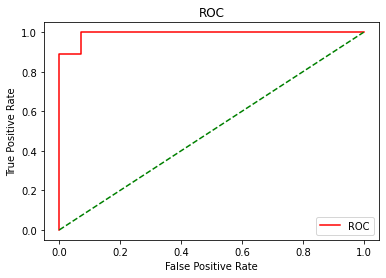

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend()
    plt.show()

prob = model.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

# 나머지 threads에 대해서 위 모델 적용 해보기

In [58]:
mf

,Post,Title,Replies,Views,Comment#,Query,Contents,Len,Days,Link,P,G_embedding,con_WG,con_BT,Label
0,1,About the Copter Logs -- deprecated category,1,1444,1,"Do not post here, please post in the *",You should probably change this,31,945,0,0,"[-0.006597005762159824, 0.00825441349297762, -...",you should probably change this,you should probabl chang thi,0
1,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,1,"Aloha, I’m a grad student at the university of...",I’m interested in this as well. I’ll be doing...,278,1,0,0,"[-0.02685326337814331, -0.0015298418002203107,...",i m interested in this as well i ll be doing ...,i m interest in thi as well i ll be do a mapp...,0
2,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,2,"Aloha, I’m a grad student at the university of...",Did you figure out how/what logs to use to get...,79,172,0,0,"[0.010020083747804165, -0.0026218986604362726,...",did you figure out how what logs to use to get...,did you figur out how what log to use to get t...,0
3,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,3,"Aloha, I’m a grad student at the university of...",I am having the same problems at the moment Ha...,183,2386,1,0,"[-0.020155683159828186, -0.015322639606893063,...",i am having the same problems at the moment ha...,i am have the same problem at the moment have ...,0
4,4,Would like to know about PID tuning of drones ...,1,812,1,I would like to know more about PID. The math ...,You might be able to find PID tuning videos on...,310,2233,1,0,"[0.006707234773784876, 0.008549664169549942, -...",you might be able to find pid tuning videos on...,you might be abl to find pid tune video on you...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,888,Setting Throttle Mid,2,252,1,As mentioned in this link: * at what altitude ...,Not sure why you think altitude matters. Anyth...,105,0,0,0,"[0.010920451954007149, 0.003929733764380217, -...",not sure why you think altitude matters anyth...,not sure whi you think altitud matters anyth ...,NaN
3357,888,Setting Throttle Mid,2,252,2,As mentioned in this link: * at what altitude ...,As they didn’t mentioned any altitude thats wh...,100,0,0,1,"[0.01810508407652378, -0.0009114950662478805, ...",as they didn t mentioned any altitude thats wh...,as they didn t mention ani altitud that whi i ...,NaN
3358,889,"3DR Y6 crash, failsafe RTL flip, logfile analy...",1,287,1,Hoping to get some expertise on deciphering my...,I should add that the copter is physically and...,704,2,0,1,"[-0.004589454270899296, 0.005204819608479738, ...",i should add that the copter is physically and...,i should add that the copter is physic and mec...,NaN
3359,890,Dataflash logging and performance,1,222,1,"Hello, I just read the documentation on datafl...","Hi bds, The easy way is simply to observe perf...",598,0,0,0,"[-0.024274002760648727, 0.020188966765999794, ...",hi bds the easy way is simply to observe perf...,hi bds the easi way is simpli to observ perfo...,NaN


In [59]:
rest_mf = mf[1097:]
rest_mf

,Post,Title,Replies,Views,Comment#,Query,Contents,Len,Days,Link,P,G_embedding,con_WG,con_BT,Label
1097,301,Need help on log analysis w crash,6,647,1,Hi all I really need your help trying to under...,I just noticed that at index 93810 all RC out ...,233,1,0,1,"[-0.0025217097718268633, -0.019900692626833916...",i just noticed that at index 93810 all rc out ...,i just notic that at index 93810 all rc out ch...,NaN
1098,301,Need help on log analysis w crash,6,647,2,Hi all I really need your help trying to under...,Q: “Also @93766 EV id = 54: does anybody know ...,119,1,1,0,"[-0.023436207324266434, -0.007360243238508701,...",q also 93766 ev id 54 does anybody know ...,q also 93766 ev id 54 doe anybodi know w...,NaN
1099,301,Need help on log analysis w crash,6,647,3,Hi all I really need your help trying to under...,Perhaps channel 8 is set to Emergency Stop? Tr...,83,1,0,0,"[-0.02673032134771347, -0.011218779720366001, ...",perhaps channel 8 is set to emergency stop? tr...,perhap channel 8 is set to emerg stop? tri gra...,NaN
1100,301,Need help on log analysis w crash,6,647,4,Hi all I really need your help trying to under...,this is exactly what’s append… the problem is...,553,2,0,1,"[0.007370766717940569, 0.013071912340819836, -...",this is exactly what s append the problem is ...,thi is exactli what append the problem is ...,NaN
1101,301,Need help on log analysis w crash,6,647,5,Hi all I really need your help trying to under...,"In your flight log, looking at lines 140 and 1...",303,2,0,0,"[-0.000650582427624613, -0.005648658610880375,...",in your flight log looking at lines 140 and 1...,in your flight log look at line 140 and 141 f...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,888,Setting Throttle Mid,2,252,1,As mentioned in this link: * at what altitude ...,Not sure why you think altitude matters. Anyth...,105,0,0,0,"[0.010920451954007149, 0.003929733764380217, -...",not sure why you think altitude matters anyth...,not sure whi you think altitud matters anyth ...,NaN
3357,888,Setting Throttle Mid,2,252,2,As mentioned in this link: * at what altitude ...,As they didn’t mentioned any altitude thats wh...,100,0,0,1,"[0.01810508407652378, -0.0009114950662478805, ...",as they didn t mentioned any altitude thats wh...,as they didn t mention ani altitud that whi i ...,NaN
3358,889,"3DR Y6 crash, failsafe RTL flip, logfile analy...",1,287,1,Hoping to get some expertise on deciphering my...,I should add that the copter is physically and...,704,2,0,1,"[-0.004589454270899296, 0.005204819608479738, ...",i should add that the copter is physically and...,i should add that the copter is physic and mec...,NaN
3359,890,Dataflash logging and performance,1,222,1,"Hello, I just read the documentation on datafl...","Hi bds, The easy way is simply to observe perf...",598,0,0,0,"[-0.024274002760648727, 0.020188966765999794, ...",hi bds the easy way is simply to observe perf...,hi bds the easi way is simpli to observ perfo...,NaN


In [60]:
rest_mf = rest_mf[['P','G_embedding']]
rest_mf

,P,G_embedding
1097,1,"[-0.0025217097718268633, -0.019900692626833916..."
1098,0,"[-0.023436207324266434, -0.007360243238508701,..."
1099,0,"[-0.02673032134771347, -0.011218779720366001, ..."
1100,1,"[0.007370766717940569, 0.013071912340819836, -..."
1101,0,"[-0.000650582427624613, -0.005648658610880375,..."
...,...,...
3356,0,"[0.010920451954007149, 0.003929733764380217, -..."
3357,1,"[0.01810508407652378, -0.0009114950662478805, ..."
3358,1,"[-0.004589454270899296, 0.005204819608479738, ..."
3359,0,"[-0.024274002760648727, 0.020188966765999794, ..."


In [65]:
X = rest_mf
numlist = list(range(len(X)))
X = X.set_index(pd.Index(numlist))
X

,P,G_embedding
0,1,"[-0.0025217097718268633, -0.019900692626833916..."
1,0,"[-0.023436207324266434, -0.007360243238508701,..."
2,0,"[-0.02673032134771347, -0.011218779720366001, ..."
3,1,"[0.007370766717940569, 0.013071912340819836, -..."
4,0,"[-0.000650582427624613, -0.005648658610880375,..."
...,...,...
2259,0,"[0.010920451954007149, 0.003929733764380217, -..."
2260,1,"[0.01810508407652378, -0.0009114950662478805, ..."
2261,1,"[-0.004589454270899296, 0.005204819608479738, ..."
2262,0,"[-0.024274002760648727, 0.020188966765999794, ..."


In [66]:
features=[]
for i in range(len(X)):
    feature=[]
    feature.append(X["P"][i])     
    for j in range(len(X['G_embedding'][i])):
        feature.append(X['G_embedding'][i][j])
    features.append(feature)
X = features

In [70]:
import pickle

with open('Correct', 'rb') as f:
    model = pickle.load(f)

predicted = model.predict(X)
print(predicted)

[0 0 0 ... 0 0 0]


In [71]:
len(predicted)

2264

In [76]:
pd.Series(predicted).value_counts()

0    2159
1     105
dtype: int64

In [88]:
rest_mf["Label"] = predicted
rest_mf

/tmp/14807.1.gpu/ipykernel_2618533/816537557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_mf["Label"] = predicted


,P,G_embedding,Label
1097,1,"[-0.0025217097718268633, -0.019900692626833916...",0
1098,0,"[-0.023436207324266434, -0.007360243238508701,...",0
1099,0,"[-0.02673032134771347, -0.011218779720366001, ...",0
1100,1,"[0.007370766717940569, 0.013071912340819836, -...",0
1101,0,"[-0.000650582427624613, -0.005648658610880375,...",0
...,...,...,...
3356,0,"[0.010920451954007149, 0.003929733764380217, -...",0
3357,1,"[0.01810508407652378, -0.0009114950662478805, ...",0
3358,1,"[-0.004589454270899296, 0.005204819608479738, ...",0
3359,0,"[-0.024274002760648727, 0.020188966765999794, ...",0


In [86]:
mf.loc[1097:,"Label"] = predicted
mf

,Post,Title,Replies,Views,Comment#,Query,Contents,Len,Days,Link,P,G_embedding,con_WG,con_BT,Label
0,1,About the Copter Logs -- deprecated category,1,1444,1,"Do not post here, please post in the *",You should probably change this,31,945,0,0,"[-0.006597005762159824, 0.00825441349297762, -...",you should probably change this,you should probabl chang thi,0
1,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,1,"Aloha, I’m a grad student at the university of...",I’m interested in this as well. I’ll be doing...,278,1,0,0,"[-0.02685326337814331, -0.0015298418002203107,...",i m interested in this as well i ll be doing ...,i m interest in thi as well i ll be do a mapp...,0
2,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,2,"Aloha, I’m a grad student at the university of...",Did you figure out how/what logs to use to get...,79,172,0,0,"[0.010020083747804165, -0.0026218986604362726,...",did you figure out how what logs to use to get...,did you figur out how what log to use to get t...,0
3,3,"Extracting pitch, roll & yaw data for image mo...",3,1136,3,"Aloha, I’m a grad student at the university of...",I am having the same problems at the moment Ha...,183,2386,1,0,"[-0.020155683159828186, -0.015322639606893063,...",i am having the same problems at the moment ha...,i am have the same problem at the moment have ...,0
4,4,Would like to know about PID tuning of drones ...,1,812,1,I would like to know more about PID. The math ...,You might be able to find PID tuning videos on...,310,2233,1,0,"[0.006707234773784876, 0.008549664169549942, -...",you might be able to find pid tuning videos on...,you might be abl to find pid tune video on you...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,888,Setting Throttle Mid,2,252,1,As mentioned in this link: * at what altitude ...,Not sure why you think altitude matters. Anyth...,105,0,0,0,"[0.010920451954007149, 0.003929733764380217, -...",not sure why you think altitude matters anyth...,not sure whi you think altitud matters anyth ...,0
3357,888,Setting Throttle Mid,2,252,2,As mentioned in this link: * at what altitude ...,As they didn’t mentioned any altitude thats wh...,100,0,0,1,"[0.01810508407652378, -0.0009114950662478805, ...",as they didn t mentioned any altitude thats wh...,as they didn t mention ani altitud that whi i ...,0
3358,889,"3DR Y6 crash, failsafe RTL flip, logfile analy...",1,287,1,Hoping to get some expertise on deciphering my...,I should add that the copter is physically and...,704,2,0,1,"[-0.004589454270899296, 0.005204819608479738, ...",i should add that the copter is physically and...,i should add that the copter is physic and mec...,0
3359,890,Dataflash logging and performance,1,222,1,"Hello, I just read the documentation on datafl...","Hi bds, The easy way is simply to observe perf...",598,0,0,0,"[-0.024274002760648727, 0.020188966765999794, ...",hi bds the easy way is simply to observe perf...,hi bds the easi way is simpli to observ perfo...,0


In [101]:
mf[mf["Label"]==1]["Contents"]

1120    chetan0412 and otherhand, thank you guys. I th...
1121    Guess I was “definitely” wrong…All is good now...
1135    Flyhard, Thank you thank you Thank you thank y...
1158    Ok downgraded to 3.1.1 plugged everything back...
1159    Ho, forget it! I went flying today and one mot...
                              ...                        
3275    Well I have been experimenting and testing ove...
3281    I repaired the copter(one broken arm, broken p...
3338    Alleluia , I found the right parameter  It’s c...
3346                               thank you Forum GODS!!
3347    This problem was discovered to be a Loose Moto...
Name: Contents, Length: 105, dtype: object

In [102]:
mf[mf["Label"]=='1']["Contents"]

59      Mission Planner update 1.3.33 of 8/12/2015 res...
86      * and * we have a liftoff yesss!. Had a wonder...
109     i deduced the issue! it was not the vibrations...
134     Just a quick feedback: We switched to breaking...
168     Jagger, I took your suggestion about a possibl...
181                                    The issue is fixed
192     Yes. Aircraft build/configuration issue. The E...
223     Thank you very much * - i would probably have ...
289     So, issue it resolved, flight is smooth as sil...
301     ok, so I found the error…: When I set the dist...
309     thanks a lot, i reduce my rate roll to 0.08. a...
326     Switching back pwm mode fixed the rtl problem ...
375     So, here we are. I fixed the issue. I must adm...
379               It is working very well! Thanks a lot *
433     First and foremost, thank you so much for the ...
442     Hello guys, I’ve finally changed the ESC’s and...
461     Hi Graham, unfortunately i do not exactly know...
575     Actual